# 📘 데이터분석
---

# <span style="background-color:#fff5b1"><span style="color:black"><B>보험사 마케팅 활용을 위한 고객 군집화 모델링

## **Mission 1. 탐색적 데이터 분석**

### **[미션 이해하기]**
* 여러분들은 K 보험사의 직원입니다. K 보험사는 효과적인 마케팅 전략을 완성시키기 위해 데이터 기반 마케팅을 시작했습니다.
  <br>고객의 행동,성향, 니즈 등의 고객 데이터를 마케팅 전략에 반영하여 고객별로 적절한 마케팅 Action을 주는 미션을 받았습니다.
* 고객별로 특징을 적절하게 반영할 수 있는 마케팅 방안은 고객을 segment 하는 것 인데, 어떤 방법으로 고객을 묶을 수 있을까요?
  <br>바로, <font color="1E90FF"><b>군집분석을 기반으로 한 고객 segment를 개발 하는 것입니다.</font>


<b>[1일차] mission 1 목표 <b>: 고객의 기본 정보, 행동 정보 등을 확인해서 주요 변수를 선정하고 데이터 탐색해보기

---------------------------------------------------------------------------------------------
# **0. 환경설정(경로설정)**
*  [필요시] 구글 colab 설정 방법
    - 경로 설정 : 구글 colab
        * 구글 드라이브 바로 밑에 dxproject 폴더를 만들고,
        * 데이터 파일을 복사해 넣습니다.

In [ ]:
# 구글 드라이브 연결
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#Path
# path = '/content/drive/MyDrive/dxproject/'

---------------------------------------------------------------------------------------------
#### <b>[실습프로세스]<b>

1. 데이터 불러오기
2. 데이터 기초 정보 확인
3. 주요 변수 선정 및 탐색
    * 분석가 선정 칼럼 탐색
    * 도메인 주요 항목 칼럼 탐색

---------------------------------------------------------------------------------------------
# **1. 데이터 불러오기**

* numpy, pandas, matplotlib, seaborn 등 데이터 분석에 필요한 라이브러리를 로딩해 봅시다.
* 만약 라이브러리가 없을 때 !pip를 통해 라이브러리를 설치해 주세요. (ex. !pip install pandas)
* 현위치에서 'customers_seg.csv' 파일을 읽어와 주세요.

In [1]:
# [같이 하기] 필요 라이브러리 로딩
# numpy, pandas, matplotlib, seaborn, os 등 임포트 하기

import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
# 한글 세팅

import matplotlib.pyplot as plt
from matplotlib import rcParams

# Windows용 폰트 설정 (예: Malgun Gothic)
rcParams['font.family'] = 'Malgun Gothic'
rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 확인용 그래프
#plt.plot([1, 2, 3], [3, 2, 1])
#plt.title("한글 폰트 테스트")
#plt.xlabel("가로축")
#plt.ylabel("세로축")
#plt.show()


In [3]:
# [같이 하기] 데이터 불러오기
# 1. data 변수에 'customers_seg.csv' 파일을 불러오기
# 2. data 변수 호출해서 상위 5개 확인해보기

data = pd.read_csv('customers_seg.csv')

# [참고] colab으로 진행할 때 
# data = pd.read_csv(path+'customers_seg.csv')
data.head()

,CID,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,1,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,...,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,2,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,...,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,3,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,...,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,4,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,...,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,5,4,계약자,고용,0,9.776436,0,기본,석사,26820200,...,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


---------------------------------------------------------------------------------------------
# **2. 데이터 기초 정보 확인하기**
* 불러온 데이터셋(data)의 기초 정보들을 확인해봅시다.

In [4]:
# [문제1] 데이터 셋의 상위 5개 행을 확인해보자.

data.head()

,CID,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,1,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,...,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,2,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,...,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,3,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,...,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,4,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,...,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,5,4,계약자,고용,0,9.776436,0,기본,석사,26820200,...,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


In [5]:
# [문제2] 데이터 셋의 하위 5개 행을 확인해보자.

data.tail()

,CID,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
11995,11996,1,계약자,고용,1,25.9851,0,기본,대학졸업,86451000,...,기혼,70,0,2,비방문,설계사독려,인터넷,245000,일반세단,중
11996,11997,3,피보험자,고용,0,3.4410,1,중급,대학졸업,25962000,...,미혼,80,0,1,자주방문,할인,자사영업,468000,일반세단,중
11997,11998,3,피보험자,무직,1,9.0576,0,중급,대학졸업,0,...,미혼,90,3,2,자주방문,할인,자사영업,977000,일반세단,중
11998,11999,4,계약자,고용,1,8.3472,0,중급,대학졸업,26366000,...,기혼,100,0,3,비방문,포인트,자사영업,854000,일반세단,대
11999,12000,3,피보험자,무직,1,2.8971,0,중급,대학졸업,0,...,미혼,80,0,1,자주방문,없음,콜센터,456000,컴팩트카,중


In [6]:
# [문제3] data 데이터프레임의 행, 열의 개수 확인해보자.(shape)

data.shape

(12000, 21)

In [7]:
#[문제4] data 데이터프레임의 컬럼명, 데이터 개수, 데이터 타입 정보를 확인 해보자.

print('데이터프레임의 컬럼명:')
print(data.columns)
print('\n데이터 개수:')
print(data.count())
print('\n데이터 타입 정보:')
print(data.dtypes)

데이터프레임의 컬럼명:
Index(['CID', 'AGE', '등록(계/피)', '고용상태', '성별', 'Willingness to pay/Stay', '갱신',
       '상품타입', '교육수준', '소득', '지역', '결혼여부', '월 납입액', 'VOC', '타 상품 보유 현황',
       '온라인방문빈도', '갱신인센티브', '판매채널', '총지불금액', '자동차', '거주지사이즈'],
      dtype='object')

데이터 개수:
CID                        12000
AGE                        12000
등록(계/피)                    12000
고용상태                       12000
성별                         12000
Willingness to pay/Stay    12000
갱신                         12000
상품타입                       12000
교육수준                       12000
소득                         12000
지역                         12000
결혼여부                       12000
월 납입액                      12000
VOC                        12000
타 상품 보유 현황                 12000
온라인방문빈도                    12000
갱신인센티브                     12000
판매채널                       12000
총지불금액                      12000
자동차                        12000
거주지사이즈                     12000
dtype: int64

데이터 타입 정보:
CID                    

In [8]:
# [문제5] 데이터 셋 수치형 데이터 기초통계 정보를 확인해보자

data.describe()

,CID,AGE,성별,Willingness to pay/Stay,갱신,소득,월 납입액,VOC,총지불금액
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,1.200000e+04,12000.000000,12000.000000,1.200000e+04
mean,6000.50000,3.079000,0.487583,8.859478,0.143000,4.641737e+07,100.065833,0.390167,5.355854e+05
std,3464.24595,1.121768,0.499867,7.698885,0.350087,3.736221e+07,42.453750,0.919605,3.587993e+05
min,1.00000,1.000000,0.000000,2.045730,0.000000,0.000000e+00,60.000000,0.000000,0.000000e+00
25%,3000.75000,3.000000,0.000000,4.373400,0.000000,0.000000e+00,70.000000,0.000000,3.360000e+05
50%,6000.50000,3.000000,0.000000,6.384831,0.000000,4.186240e+07,90.000000,0.000000,4.740000e+05
75%,9000.25000,4.000000,1.000000,9.867900,0.000000,7.664150e+07,120.000000,0.000000,6.790000e+05
max,12000.00000,6.000000,1.000000,92.496300,1.000000,1.320209e+08,350.000000,5.000000,3.573000e+06


In [9]:
# [문제6] 데이터 셋의 모든 컬럼명(변수명)을 확인해보자.

data.columns

Index(['CID', 'AGE', '등록(계/피)', '고용상태', '성별', 'Willingness to pay/Stay', '갱신',
       '상품타입', '교육수준', '소득', '지역', '결혼여부', '월 납입액', 'VOC', '타 상품 보유 현황',
       '온라인방문빈도', '갱신인센티브', '판매채널', '총지불금액', '자동차', '거주지사이즈'],
      dtype='object')

---------------------------------------------------------------------------------------------
# **3. 주요 변수 선정 및 탐색**

<b> 21개의 features 값은 어떤 의미일지 알아보고 주요 변수를 선정해 봅시다!

---------------------------------------------------------------------------------------------
<b>이 중 주요 변수를 선정 해 보았을 때 <font color="1E90FF"><b>11개의 features를 선정하였다.</font>
<font color="1E90FF"><b>* 우리의 목표: 군집화가 된 고객 segment 개발</font>
   
<span><b>1. 도메인 내 주요 정보 항목</span>
    <br><br>
        - (1) Willingness to pay/Stay: 계속 보험을 유지할 지 판단하는 지표 (신용점수, 납부/연체기록, 소득 등 활용)
    <br>- (2) 소득
    <br>- (3) 월 납입액
    <br>- (4) 타상품 보유 현황: 고객이 이용하는 K보험사의 타 서비스 수(어느정도 고객의 충성도를 알 수 있음)
    <br>- (5) 총지불금액
    
<span><b>2. 분석가 선정 컬럼</span>
    <br><br>- (6)AGE, (7)고용상태, (8)교육수준: 고객 기본 정보
    <br>- (9)상품타입, (10)거주지사이즈, (11)자동차: 소득 등과 연관해서 추정이 가능한 정보

## <b> (1) 분석가 선정 컬럼 탐색하기
* 분석가 선정 컬럼 : AGE, 고용상태, 교육수준, 상품 타입, 거주지사이즈, 자동차(총 6개 피쳐)
* 위 분석가 선정 컬럼을 탐색해 보자!

In [10]:
#[문제 7] 분석가 선정 컬럼들이 수치형인지 문자/범주형인지 알아보자! (info 활용)

data[['AGE', '고용상태', '교육수준', '상품타입', '거주지사이즈', '자동차']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AGE     12000 non-null  int64 
 1   고용상태    12000 non-null  object
 2   교육수준    12000 non-null  object
 3   상품타입    12000 non-null  object
 4   거주지사이즈  12000 non-null  object
 5   자동차     12000 non-null  object
dtypes: int64(1), object(5)
memory usage: 562.6+ KB


**【각각의 변수들이 어떤 의미를 가지고 있을지 데이터 탐색을 해보자!】**
- 수치형 데이터: AGE
- 범주형 데이터: 고용상태, 교육수준, 상품타입, 거주지사이즈, 자동차

### 1) AGE

In [11]:
data['AGE'].unique()

array([3, 1, 2, 5, 4, 6])

In [12]:
#[같이 하기] AGE 변수는 범주형이다. 이에 대해 범주별 비율을 탐색해보자.(.value_counts())
#  (1: 20대, 2: 30대, 3: 40대, 4: 50대, 5: 60대, 6: 70대)
# 결과를 인덱스 기준으로 정렬해서 조회 (.sort_index())

data['AGE'].value_counts(normalize = True).sort_index()

AGE
1    0.121167
2    0.128167
3    0.397917
4    0.260333
5    0.088083
6    0.004333
Name: proportion, dtype: float64

<b>**age 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

- 연령대 비율 정리
  - 20대: 약 12%
  - 30대: 약 13%
  - 40대: 약 40%
  - 50대: 약 26%
  - 60대: 약 9%
  - 70대: 약 0% (0.004 근접)
- 40대(40%)와 50대(26%)가 전체의 2/3 이상을 차지하는 것으로 볼 때, 해당 상품 가입의 핵심 연령층은 중/장년층입을 알 수 있습니다.
- 젊은층(2030)의 상품 가입률은 상대적으로 저조하지만, 장기적으로 고객 생애주기적 관점에서 주요 잠재 고객을 볼 수 있어, 해당 연령층을 확보할 수 있는 상품 전략을 설계하는 작업이 필요하다고 판단됩니다.
- 고령층(6070)의 상품 가입률이 매우 낮아서, 해당 연령층의 관리 전략이 필요하다고 판단됩니다.

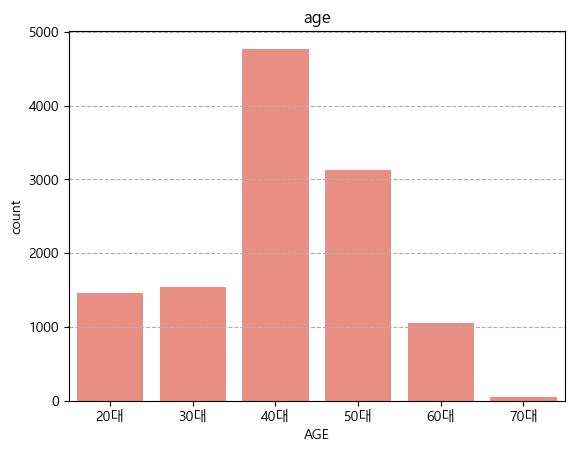

In [13]:
#[같이 하기] age에 대해 countplot 으로 시각화를 해보자!
# 1. sns.countplot(x=' ', data= )으로 시각화. 색상은 원하는 색상으로!
# 2. title=('age'), grid 도 넣어서 이쁘게 만들어보자.

sns.countplot(x='AGE',data=data, color='salmon')
plt.title('age')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['20대', '30대', '40대', '50대', '60대', '70대'])
plt.grid(axis='y', linestyle='--')
plt.show()

### 2) 고용상태

In [14]:
#[문제 8] '고용상태' 변수에 대해 범주별 빈도수를 탐색해보자.

data['고용상태'].value_counts()

고용상태
고용       7518
무직       3028
휴직       1094
FALSE     360
Name: count, dtype: int64

In [15]:
#[문제 9] 위 결과에 대해 비율로 계산해보자.
data['고용상태'].value_counts(normalize=True)

고용상태
고용       0.626500
무직       0.252333
휴직       0.091167
FALSE    0.030000
Name: proportion, dtype: float64

In [16]:
# 퍼센트(%)로 보기
data['고용상태'].value_counts(normalize=True)*100

고용상태
고용       62.650000
무직       25.233333
휴직        9.116667
FALSE     3.000000
Name: proportion, dtype: float64

In [17]:
#[문제 10] FALSE 값이 있잖어? 이게 뭐지?
# False를 무엇으로 해석해야 할까?
# 
data.groupby('고용상태')['소득'].describe()

,count,mean,std,min,25%,50%,75%,max
고용상태,,,,,,,,
FALSE,360.0,2.540410e+07,6.854710e+06,12233000.0,19718225.0,25927000.0,31136000.0,39249100.0
고용,7518.0,6.925233e+07,2.722579e+07,24045000.0,45367500.0,68289950.0,90788500.0,132020900.0
무직,3028.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
휴직,1094.0,2.488481e+07,6.806250e+06,12061000.0,19445000.0,25209000.0,30416150.0,39601100.0


<b>**'고용상태' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**


- 고용상태를 비율로 확인하자면, 고용 상태인 비율은 약 63%, 무직인 비율은 약 25%, 휴직인 비율은 약 10%입니다.
- 즉, 상품 가입자들 중 약 63%는 일을 하고 있는 상태이고, 나머지 35%는 은퇴를 하였거나 아직 취업을 하지 않은 상황으로 해석할 수 있습니다.
- FALSE의 비율은 약 3%인데, 이 값은 고객이 보험사에게 고용상태를 알려주지 않아서 나타난 결측값을 대체한 값이라고 해석할 수 있습니다.

(GPT 해석)
- FALSE는 아마도 데이터 입력/인코딩 과정에서 잘못 들어간 값일 확률이 높습니다.
- 소득 분포가 휴직과 거의 동일하므로, FALSE → 휴직으로 매핑하는 것이 가장 합리적입니다.
- 만약 원천 데이터에서 확인이 가능하다면, 실제로 어떤 상태를 의미하는지 확인 후 정정하는 것이 최선입니다.
- 확인이 불가능하다면, 분석 목적에 따라:
  - 휴직으로 치환 (가장 자연스러운 해석)
  - 혹은 별도의 집단으로 두고 분석 (데이터 오류 가능성을 명시)

In [18]:
# '고용상태' 컬럼에서 'FALSE' 값을 '휴직'으로 치환
data['고용상태'] = data['고용상태'].replace('FALSE', '휴직')

# 치환 결과 확인
print(data['고용상태'].value_counts())

고용상태
고용    7518
무직    3028
휴직    1454
Name: count, dtype: int64


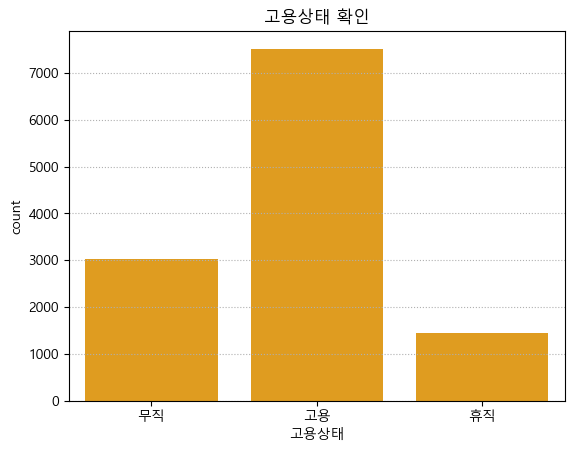

In [19]:
#[문제 11] '고용상태'에 대해 countplot 으로 시각화를 해보자!

sns.countplot(x='고용상태',data=data, color='orange')
plt.title('고용상태 확인')
plt.grid(axis='y', linestyle=':')
plt.show()

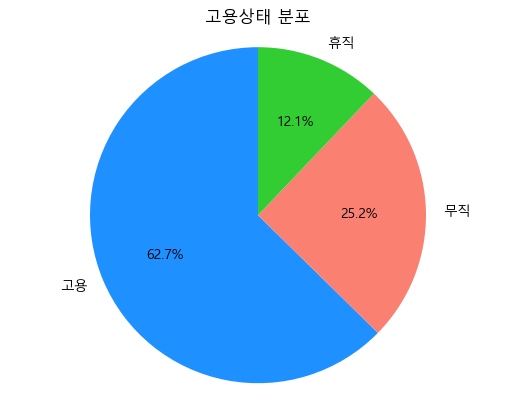

In [20]:
# 추가
# 파이그래프로 비중 확인
work_state = data['고용상태'].value_counts()

plt.pie(work_state, labels=work_state.index, autopct='%1.1f%%', startangle=90, colors=['dodgerblue', 'salmon', 'limegreen', 'violet'])
plt.title('고용상태 분포')
plt.axis('equal') #원형 유지
plt.show()

### 3) 교육수준

In [21]:
#[문제 12] '교육수준' 변수에 대해 범주별 빈도수를 탐색해보자.

data['교육수준'].value_counts()

교육수준
대학졸업    7105
고졸이하    3477
석사       979
박사       439
Name: count, dtype: int64

In [22]:
#[문제 13] 위 결과에 대해 비율로 계산해보자.

data['교육수준'].value_counts(normalize=True)

교육수준
대학졸업    0.592083
고졸이하    0.289750
석사      0.081583
박사      0.036583
Name: proportion, dtype: float64

In [23]:
# 위 결과에 대해 비율로 계산해보자.(퍼센트 변환)

data['교육수준'].value_counts(normalize=True)*100

교육수준
대학졸업    59.208333
고졸이하    28.975000
석사       8.158333
박사       3.658333
Name: proportion, dtype: float64

<b>**'교육수준' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

- 대학 졸업, 고졸 이하, 석사, 박사 순으로 구성되어 있습니다.
- 대학 졸업 비율은 약 60%이고, 고졸 이하는 약 29%, 석사와 박사 비율은 각각 약 8%, 4%입니다.
- 대체로 고학력 중심이므로, 보험 상품에 대한 이해도와 장기적 가입 유지 가능성에 긍정적으로 작용할 수 있습니다.
- 하지만 고졸 이하의 비중도 대졸 다음으로 크기 때문에, 고객에 따라 상품 설명의 난이도를 조절하고, 고객에 맞는 니즈 전략을 설계할 필요가 있습니다.

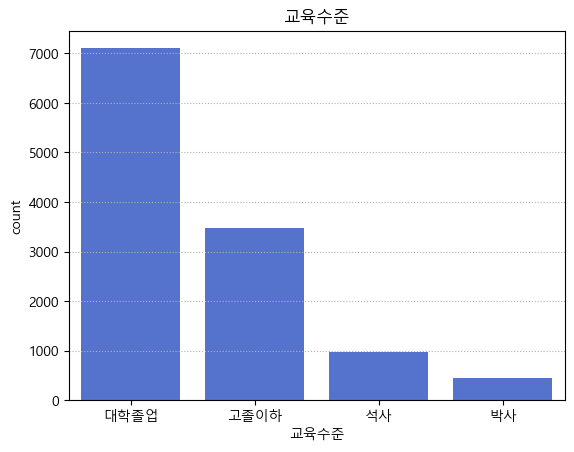

In [24]:
#[문제 14] '교육수준'에 대해 countplot 으로 시각화를 해보자!

sns.countplot(x='교육수준', data=data, color='royalblue')
plt.title('교육수준')
plt.grid(axis='y', linestyle=':')
plt.show()

### 4) 상품타입

In [25]:
data['상품타입'].value_counts()

상품타입
기본    7278
중급    3647
고급    1075
Name: count, dtype: int64

In [26]:
#[문제 15] '상품타입'변수에 대해 범주별 비율을 탐색해보자.

data['상품타입'].value_counts(normalize=True)

상품타입
기본    0.606500
중급    0.303917
고급    0.089583
Name: proportion, dtype: float64

In [27]:
# '상품타입'변수에 대해 범주별 비율을 탐색해보자.

data['상품타입'].value_counts(normalize=True)*100

상품타입
기본    60.650000
중급    30.391667
고급     8.958333
Name: proportion, dtype: float64

<b>**'상품타입' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

- 상품타입은 기본, 중급, 고급으로 구성되어 있습니다.
- 기본의 비율이 약 61%, 중급이 약 30%, 고급이 약 9% 비중을 차지하고 있습니다.
- 고급일수록 혜택이 증가하는데 고객의 절반 이상은 기본 상품으로 가입한 것으로 보아, 보험 혜택이 가입 결정의 주 요인은 아닐 수 있다고 유추할 수 있습니다.

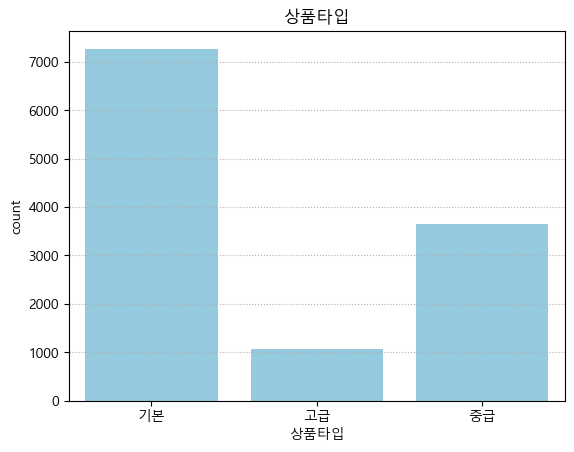

In [28]:
#[문제 16] '상품타입'에 대해 countplot 으로 시각화를 해보자!

sns.countplot(x='상품타입', data=data, color='skyblue')
plt.title('상품타입')
plt.grid(axis='y', linestyle=':')
plt.show()

### 5) 거주지사이즈

In [29]:
#[문제 17]'거주지사이즈'변수에 대해 범주별 비중을 탐색해보자.

data['거주지사이즈'].value_counts()

거주지사이즈
중    8423
소    2332
대    1245
Name: count, dtype: int64

In [30]:
#[문제 17]'거주지사이즈'변수에 대해 범주별 비율을 탐색해보자.

data['거주지사이즈'].value_counts(normalize=True)

거주지사이즈
중    0.701917
소    0.194333
대    0.103750
Name: proportion, dtype: float64

In [31]:
#'거주지사이즈'변수에 대해 범주별 비율을 탐색해보자. (퍼센트)

data['거주지사이즈'].value_counts(normalize=True)*100

거주지사이즈
중    70.191667
소    19.433333
대    10.375000
Name: proportion, dtype: float64

<b>**'거주지사이즈' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

- 거주지 사이즈는 거주 주택의 가격, 평형대를 종합적으로 고려하여 정한 것으로 소, 중, 대로 구성되어 있습니다.
- 고객 중 약 70%가 사이즈 중이며, 약 19%는 소, 약 10%는 대 사이즈에서 거주하고 있습니다.
- 이는 해당 상품의 고객군이 전반적으로 중산층이라고 유추할 수 있습니다. 하지만 약 30%가 소형 주택 거주자와 대형 주택 거주자이기 때문에 중산층을 위한 표준형 상품을 중심으로 하되, 거주지 사이즈에 따른 세분화된 전략을 가지는 것이 필요하다고 볼 수 있습니다.

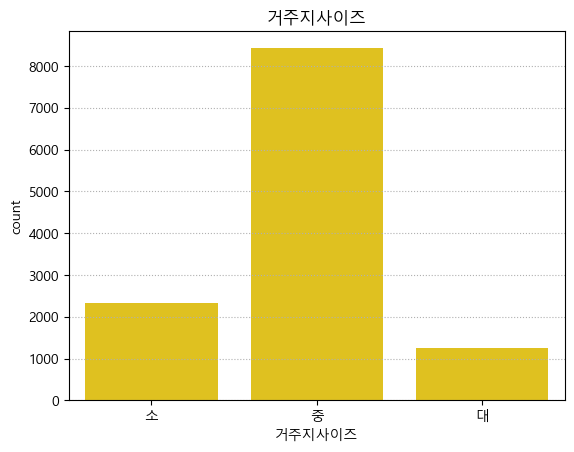

In [32]:
#[문제 18] '거주지사이즈'에 대해 countplot 으로 시각화를 해보자!

sns.countplot(x='거주지사이즈', data=data, color='gold')
plt.title('거주지사이즈')
plt.grid(axis='y', linestyle=':')
plt.show()

### 6) 자동차

In [33]:
#[문제 19]'자동차'변수에 대해 범주별 비중을 탐색해보자.

data['자동차'].value_counts()

자동차
일반세단    6074
컴팩트카    2484
SUV     2336
스포츠카     652
고급차      454
Name: count, dtype: int64

In [34]:
#[문제 19]'자동차'변수에 대해 범주별 비율을 탐색해보자.

data['자동차'].value_counts(normalize=True)

자동차
일반세단    0.506167
컴팩트카    0.207000
SUV     0.194667
스포츠카    0.054333
고급차     0.037833
Name: proportion, dtype: float64

In [35]:
# '자동차'변수에 대해 범주별 비율을 탐색해보자. (퍼센트)

data['자동차'].value_counts(normalize=True)*100

자동차
일반세단    50.616667
컴팩트카    20.700000
SUV     19.466667
스포츠카     5.433333
고급차      3.783333
Name: proportion, dtype: float64

<b>**'자동차' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

- 자동차 항목은 일반세단, 컴팩트카, SUV, 스포츠카, 고급차 순으로 구성되어 있습니다.
- 고객의 약 51%는 일반세단을 가지고 있으며, 약 21%는 컴팩트 카, 약 19%는 SUV, 약 5%는 스포츠카, 약 4%는 고급차를 가지고 있습니다.
- 일반세단의 경우 중산층,실속형 소비자가 많이 이용하는 종류로 거주지 사이즈에서 중이 가장 많이 나온 결과와 연관지을 수 있습니다.
- 컴팩트카의 경우 젊은층, 1~2인 가구가 많이 이용할 가능성이 있는 종류로 경제성을 중시하는 고객군일 가능성이 있습니다.
- SUV의 경우 가족 단위로 활동적인 라이프스타일을 즐기는 고객들이 많이 사용하는 종류라는 것을 파악할 수 있고, 상품 가입 연령대 중 중장년층(4050)이 많다는 정보와 연계할 수 있습니다.
- 스포츠카와 고급차 비율은 약 10%로 적지만, 고소득 고객군으로 차별화된 전략을 세울 필요가 있다고 볼 수 있습니다.
- 연령대에 따라 본인이 아닌 가족 구성원 소유의 공동 사용하는 차량일 수 있음을 고려해야 합니다.

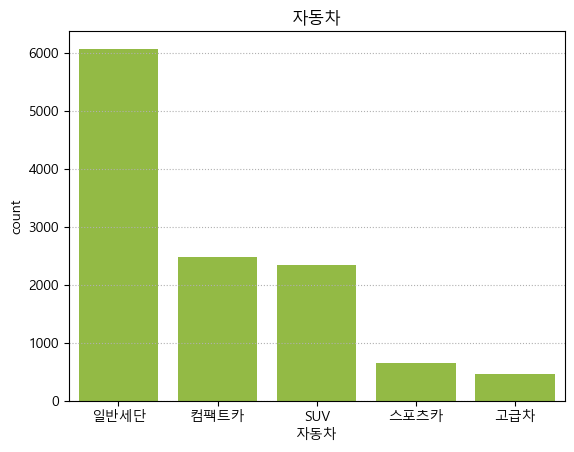

In [36]:
#[문제 20]'자동차'에 대해 countplot 으로 시각화를 해보자!

sns.countplot(x='자동차', data=data, color='yellowgreen')
plt.title('자동차')
plt.grid(axis='y', linestyle=':')
plt.show()

## **(2) 도메인 주요 항목 컬럼 탐색하기**
* 도메인 주요 항목 : Willingness to pay/Stay,소득,월 납입액,타상품 보유 현황,총지불금액(총 5개 항목)
* 위 도메인 주요 항목 컬럼을 histplot 을 통해서 탐색해 보자

In [37]:
#[문제 21] 도메인 내 주요 항목 컬럼들이 수치형인지 문자형인지 알아보자! (info 활용)

data[['Willingness to pay/Stay', '소득', '월 납입액', '타 상품 보유 현황', '총지불금액']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Willingness to pay/Stay  12000 non-null  float64
 1   소득                       12000 non-null  int64  
 2   월 납입액                    12000 non-null  int64  
 3   타 상품 보유 현황               12000 non-null  object 
 4   총지불금액                    12000 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 468.9+ KB


### 1) WTP(Willingness to pay/Stay)
보험 유지 기대 확률
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기


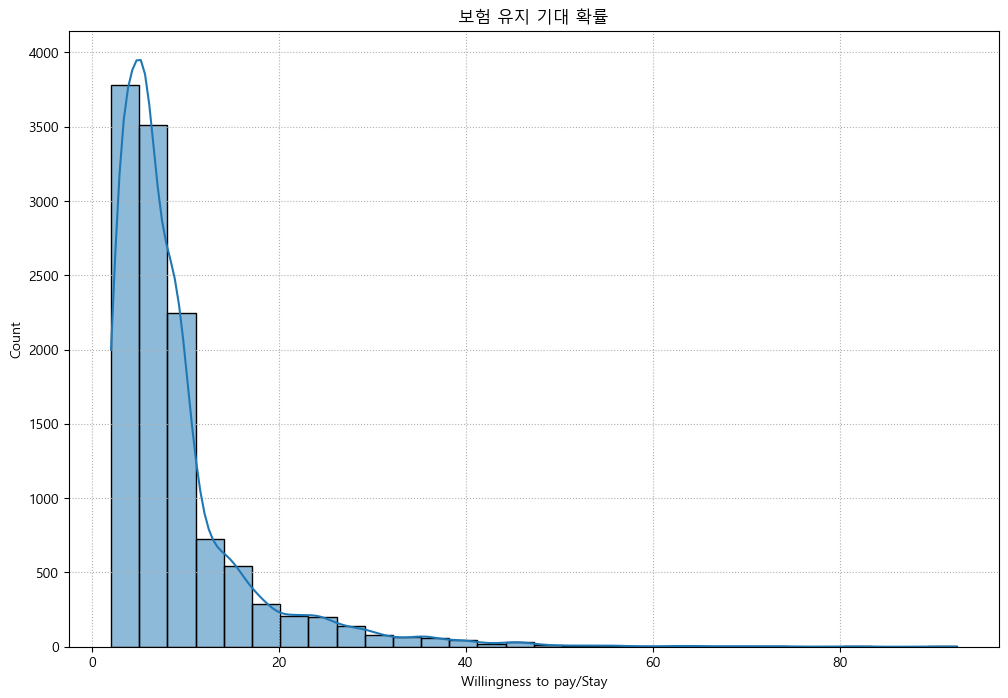

In [38]:
#[같이 하기] 히스토그램으로 'Willingness to pay/Stay(WTP)'에 대한 그래프를 그려보자.

# 1. figsize(12,8) 셋팅하기

plt.figure(figsize=(12,8))

# 2. histplot 그리기
# bins = 30, kde = True로 설정해서 그래프를 그려보자.

sns.histplot(data['Willingness to pay/Stay'],bins=30,kde=True)
plt.title('보험 유지 기대 확률')
plt.grid(linestyle=':')
plt.show()

In [39]:
#[같이 하기] WTP의 평균값을 확인해보자(describe 사용)

data['Willingness to pay/Stay'].describe()

count    12000.000000
mean         8.859478
std          7.698885
min          2.045730
25%          4.373400
50%          6.384831
75%          9.867900
max         92.496300
Name: Willingness to pay/Stay, dtype: float64

<b>**'Willingness to pay/Stay(WTP)' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

- 보험 유지 기대 확률의 평균은 8.86 정도이며 표준 편차는 약 7.7으로 분산이 꽤 큰 편입니다.
- 최소값은 2, 최대값은 92 정도로 분포의 범위가 넓습니다.
- 1사분위수는 약 4, 3사분위 수는 약 10 정도 되며, 중앙값은 약 6으로 평균값보다 작습니다.
- 분포가 오른쪽으로 긴 꼬리를 가진 **우측 편향**을 보이며 대부분의 값이 작은 쪽에 집중되어 있습니다.
- 값이 작을수록 빈도수가 큰 것으로 보아 보험 유지 기대 확률은 전반적으로 낮은 값에 집중되어 있으며, 일부 큰 값(최대값 92)으로 인해 평균이 다소 높게 나타난다고 볼 수 있습니다.

### 2) 소득
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기

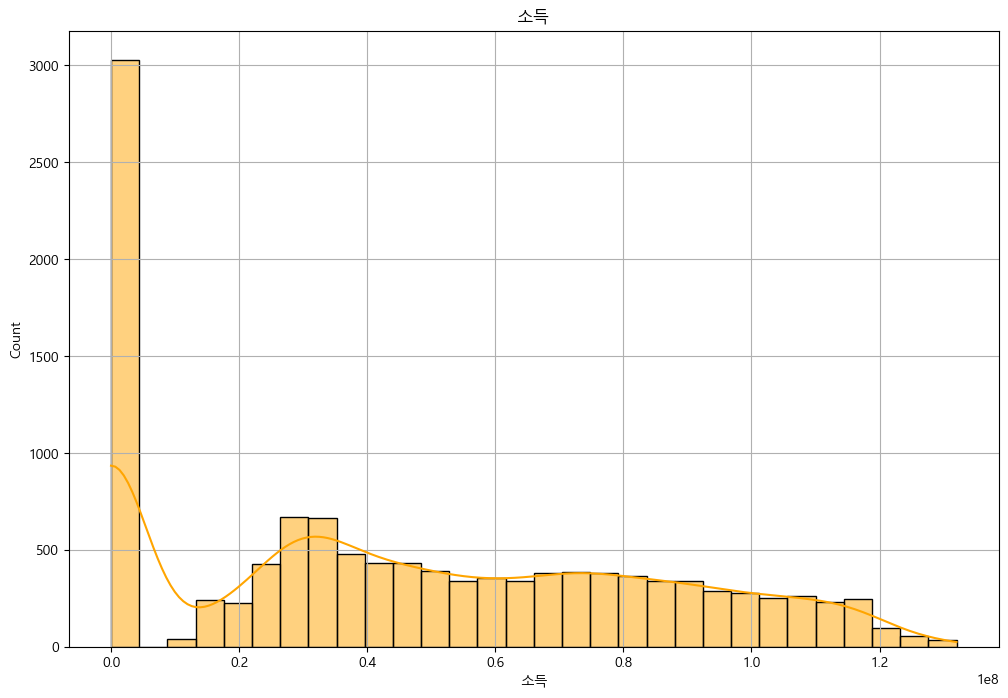

In [40]:
#[문제 22] 히스토그램으로 '소득'에 대한 그래프를 그려보자.
# bins = 30, kde = True로 설정해서 한번 보자
plt.figure(figsize=(12, 8))

sns.histplot(data['소득'], bins=30, kde=True, color='orange')
plt.title('소득')
plt.grid()
plt.show()

In [41]:
data['소득'].describe()

count    1.200000e+04
mean     4.641737e+07
std      3.736221e+07
min      0.000000e+00
25%      0.000000e+00
50%      4.186240e+07
75%      7.664150e+07
max      1.320209e+08
Name: 소득, dtype: float64

<b>**'소득' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

- 소득의 평균은 약 46,417,370이고, 표준편차는 약 37,362,210으로 분산이 매우 큽니다.
- 중앙값은 약 41,862,400으로 평균보다 값이 작습니다. 분포가 우측으로 긴 꼬리(**우측 편향**)을 가지고 있습니다.
- 소득의 최소값은 0, 1사분위수도 0으로 봤을 때 전체의 최소 25% 이상이 0값임을 알 수 있습니다.
- 그래프로 봤을 때 소득이 0값에 집중되어 있고, 나머지는 수천만 단위의 값으로 분포하는 **이원적 구조**를 가지고 있습을 알 수 있습니다.
- 전반적으로 소득은 낮은 값(특히 0)에 집중되어 있으면서도, 일부 고액 값이 존재하는 **우측 편향 분포**를 가진다고 해석할 수 있습니다.

### 3) 월 납입액
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기

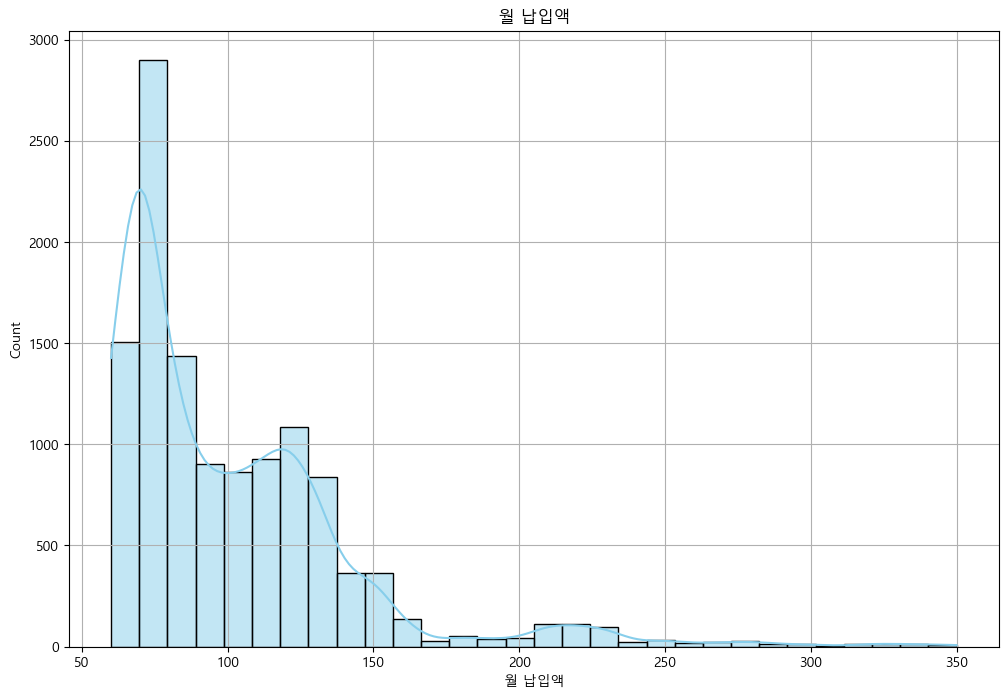

In [42]:
#[문제 23] 히스토그램으로 '월 납입액'에 대한 그래프를 그려보자.
# bins = 30, kde = True로 설정해서 한번 보자

plt.figure(figsize=(12, 8))

sns.histplot(data['월 납입액'], bins=30, kde=True, color='skyblue')
plt.title('월 납입액')
plt.grid()
plt.show()

In [43]:
#[문제 24] '월 납입액'의 평균값을 확인해보자(describe 사용)
data['월 납입액'].describe()

count    12000.000000
mean       100.065833
std         42.453750
min         60.000000
25%         70.000000
50%         90.000000
75%        120.000000
max        350.000000
Name: 월 납입액, dtype: float64

In [44]:
data['월 납입액'].mean()

np.float64(100.06583333333333)

<b>**'월 납입액' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

- 월 납입액의 평균 금액은 약 100만원으로 추정되며, 표준편차는 약 42만원으로 분산이 꽤 크다고 볼 수 있습니다. 
- 중앙값이 90만원으로 평균보다 낮습니다.
- 납입액의 최소 금액은 약 60만원이고, 1사분위수(하위 25%) 금액은 약 70만원이며 3사분위수(상위 25%) 금액은 120만원이고, 최대 금액은 350만원입니다.
- 히스토그램을 보면, 전체적으로 평균보다 낮은 값에 분포가 많이 되어 있고, 최대값이 매우 크기 때문에 우측으로 왜도된 분포를 보여줍니다.
- 최대값 350만원은 다른 값들과 비교했을 때 매우 큰 값이기 때문에 이상치일 가능성이 있습니다.

### 4) 타상품 보유
* 문자형/범주형 컬럼이기 때문에 범주 비율로 확인해보기

In [45]:
data['타 상품 보유 현황'].value_counts()

타 상품 보유 현황
1      4283
4이상    3155
2      3017
3      1545
Name: count, dtype: int64

In [46]:
#[문제 25] '타상품 보유' 변수에 대해 범주별 비율을 확인하자.

data['타 상품 보유 현황'].value_counts(normalize=True)*100

타 상품 보유 현황
1      35.691667
4이상    26.291667
2      25.141667
3      12.875000
Name: proportion, dtype: float64

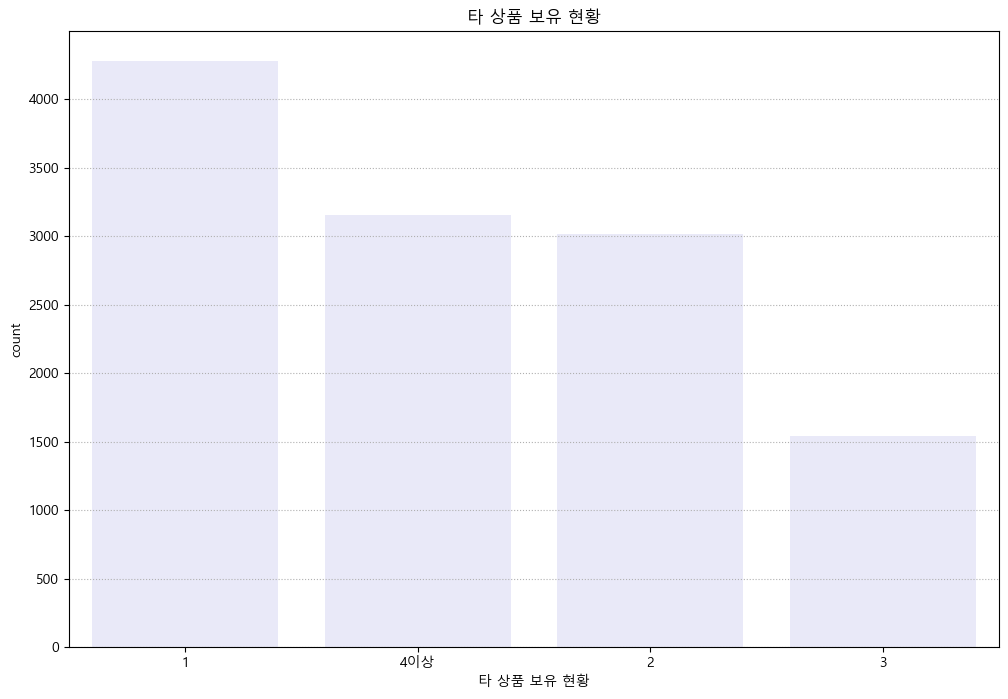

In [47]:
plt.figure(figsize=(12, 8))

sns.countplot(x='타 상품 보유 현황', data=data, color='lavender')
plt.title('타 상품 보유 현황')
plt.grid(axis='y', linestyle=':')
plt.show()

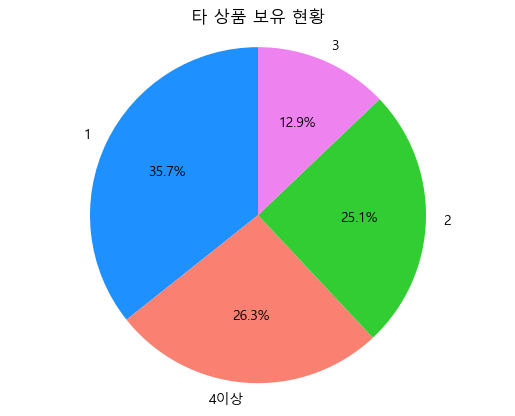

In [48]:
other_prodcut = data['타 상품 보유 현황'].value_counts()

plt.pie(
    other_prodcut, 
    labels=other_prodcut.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['dodgerblue', 'salmon', 'limegreen', 'violet']
)
plt.title('타 상품 보유 현황')
plt.axis('equal') #원형 유지
plt.show()

<b>**'타상품 보유' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

- 건강 보험 상품 가입 고객은 P사의 타 서비스(자동차 보험 및 대출 등 금융 서비스)를 사용하고 있다는 사실이 확인됩니다.
- 고객 중 약 36%는 타상품 1개를 보유하고 있고, 약 26%는 4개 이상 보유하고 있으며, 약 25%는 2개, 약 13%는 3개 보유하고 있습니다.
- 타 서비스를 1개 보유하고 있는 고객 비율과 4개 이상 보유하고 있는 고객 비율이 거의 유사한 것으로 보아 상품에 대한 고객 충성도에 따른 전략을 세분화하는 작업이 필요하다고 판단할 수 있습니다.

### 5) 총지불금액
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기

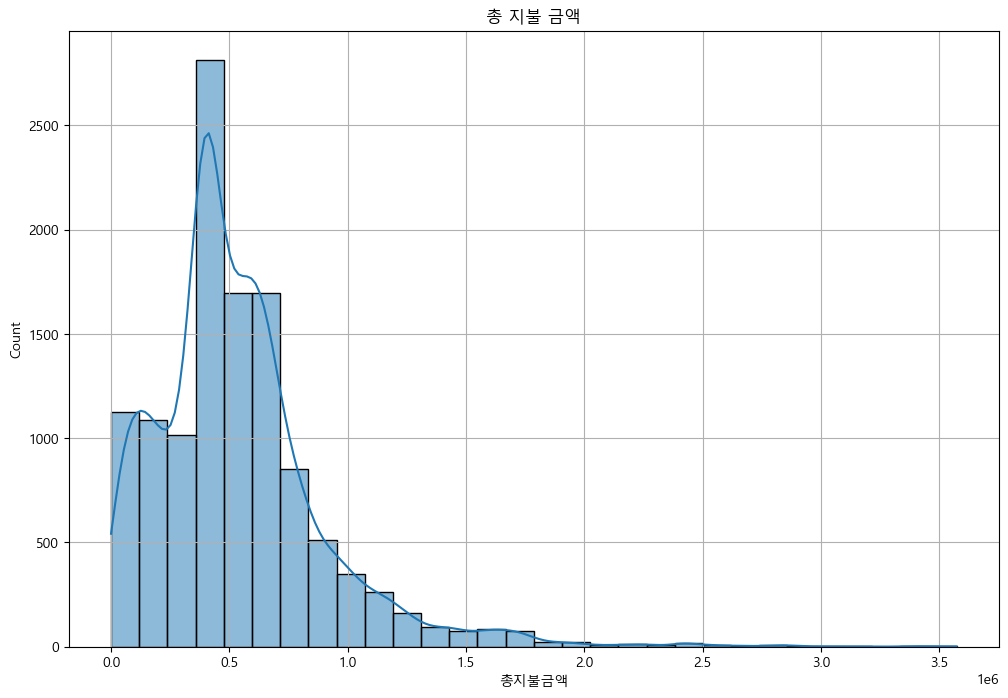

In [49]:
#[문제 26] 히스토그램으로 '총지불금액'에 대한 그래프를 그려보자.
# bins = 30, kde = True로 설정해서 한번 보자

plt.figure(figsize=(12, 8))

sns.histplot(data['총지불금액'], bins=30, kde=True)
plt.title('총 지불 금액')
plt.grid()
plt.show()

In [50]:
#[문제 27] '총지불금액'의 평균값을 확인해보자(describe 사용)

data['총지불금액'].describe()

count    1.200000e+04
mean     5.355854e+05
std      3.587993e+05
min      0.000000e+00
25%      3.360000e+05
50%      4.740000e+05
75%      6.790000e+05
max      3.573000e+06
Name: 총지불금액, dtype: float64

<b>**'총 지불 금액' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

'총 지불 금액': 의료비 청구 이후 심사 후 지급 금액 (KRW 원단위)
- 총 지불 금액의 평균은 약 53만원이고, 표준편차는 약 36만원입니다. 중앙값은 약 47만원으로 평균값보다 작기 때문에 우측으로 꼬리가 긴 분포를 가지고 있습니다. 이는 지불 금액의 최대값이 매우 크며 이상치로 작용될 수 있음을 알 수 있습니다.
- 하위 25%는 약 34만원, 상위 25%는 약 68만원을 지급하였으며 최소값은 0, 최대값은 약 357만원을 지급하였습니다.
- 최소값이 0인것으로 보아 의료비 청구 이후 심사 후 지급이 이루어지지 않은 사례를 확인해볼 필요가 있습니다. (예: 청구 기각, 미지급 등)

# **4. Mission 1-변수 탐색 결론**

* 수치형 컬럼 이외에도, 주요 변수 중 object 형태의 컬럼이 존재
* 수치형 컬럼은 단위가 각각 다르므로 스케일링 고려 필요
* 범주형 컬럼은 인코딩을 통해서 모델링을 위한 변환이 필요

<font color="1E90FF"><b>→ 데이터를 확인하고 탐색하여 전처리의 방향성 및 feature 값에 대한 이해 증대<b><br>
    

# <b>Mission 1 완료!
수고하셨습니다!

# 📘 데이터전처리
---

# <span style="background-color:#fff5b1"><span style="color:black"><B>보험사 마케팅 활용을 위한 고객 군집화 모델링

## **Mission 2. 데이터 전처리**

### [미션 이해하기]
* 여러분들은 K 보험사의 직원입니다. K 보험사는 효과적인 마케팅 전략을 완성시키기 위해 데이터 기반 마케팅을 시작했습니다.
  <br>고객의 행동,성향, 니즈 등의 고객 데이터를 마케팅 전략에 반영하여 고객별로 적절한 마케팅 Action을 주는 미션을 받았습니다.
* 고객별로 특징을 적절하게 반영할 수 있는 마케팅 방안은 고객을 segment 하는 것 인데, 어떤 방법으로 고객을 묶을 수 있을까요?
  <br>바로, <font color="1E90FF"><b>군집분석을 기반으로 한 고객 segment를 개발 하는 것입니다.</font>


<b>[1일차] mission 2 목표<b>: 군집분석을 기반으로 하는 고객 segment 적용 전 주요 데이터 전처리를 수행해보기

---------------------------------------------------------------------------------------------
# **0. 환경설정(경로설정)**
* [필요시] 구글 colab 설정 방법
    - 경로 설정 : 구글 colab
        * 구글 드라이브 바로 밑에 dxproject 폴더를 만들고,
        * 데이터 파일을 복사해 넣습니다.

In [ ]:
# 구글 드라이브 연결
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#Path
# path = '/content/drive/MyDrive/dxproject/'

---------------------------------------------------------------------------------------------
#### <b>[실습프로세스]<b>

1. 범주 인코딩
    * 각 범주별 0, 1로 인코딩 하기
2. 스케일링


---------------------------------------------------------------------------------------------
# **1. 범주 인코딩**
* 범주형 변수 값(텍스트) 을 수치형 값(숫자)으로 변환하는 방법을 사용하여 알고리즘이 인식할 수 있도록 변환해 봅시다.
* 범주 인코딩 방법은 Label-encoding 과 one-hot-encoding 등이 있습니다.
    * Label-encoding : 0, 1, 2, 3, ...
    * one-hot-encoding : 가변수화
* 우리는 어떻게 범주 인코딩을 할 수 있을까요?

## **(1) 데이터 불러오기**


In [51]:
#[문제 1] 필요 라이브러리 로딩
# numpy, pandas, matplotlib, seaborn, os 를 임포트 하기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

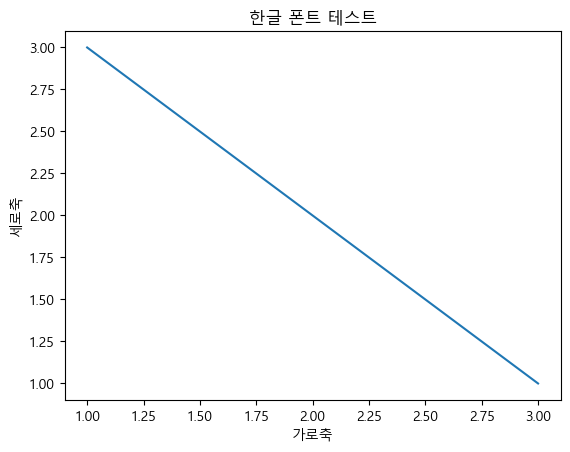

In [52]:
# 한글 세팅

import matplotlib.pyplot as plt
from matplotlib import rcParams

# Windows용 폰트 설정 (예: Malgun Gothic)
rcParams['font.family'] = 'Malgun Gothic'
rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 확인용 그래프
plt.plot([1, 2, 3], [3, 2, 1])
plt.title("한글 폰트 테스트")
plt.xlabel("가로축")
plt.ylabel("세로축")
plt.show()

In [53]:
# [문제 2] 데이터 불러오기
# data 변수에 'customers_seg.csv' 파일을 불러오기

data = pd.read_csv('customers_seg.csv')


In [54]:
# [문제 3] 데이터 상위 5개 조회

data.head()

,CID,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,1,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,...,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,2,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,...,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,3,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,...,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,4,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,...,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,5,4,계약자,고용,0,9.776436,0,기본,석사,26820200,...,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


## **(2) 활용할 변수 선정하기**

In [55]:
# [문제 4] 데이터 셋의 모든 컬럼명(변수명)을 확인해보자.(columns로 확인)

data.columns

Index(['CID', 'AGE', '등록(계/피)', '고용상태', '성별', 'Willingness to pay/Stay', '갱신',
       '상품타입', '교육수준', '소득', '지역', '결혼여부', '월 납입액', 'VOC', '타 상품 보유 현황',
       '온라인방문빈도', '갱신인센티브', '판매채널', '총지불금액', '자동차', '거주지사이즈'],
      dtype='object')

In [56]:
# [문제 5] mission 1에서 선정한 11개의 변수만 가지고 있는 데이터 프레임 생성하기

# 1. data를 data_choice 변수에 copy 해놓기

data_choice = data.copy()

# 2. col 에 선정한 11개 변수를 리스트로 할당해보자.
# [참고] 11개 변수: 'AGE', '고용상태', 'Willingness to pay/Stay', '상품타입',
# '교육수준', '소득', '월 납입액','타 상품 보유 현황', '총지불금액', '거주지사이즈','자동차'

col = ['AGE', '고용상태', 'Willingness to pay/Stay', '상품타입',
       '교육수준', '소득', '월 납입액','타 상품 보유 현황', '총지불금액', '거주지사이즈','자동차']

# 3.data_choice 변수에 col 할당 후 data_choice 데이터를 확인해보자.

data_choice = data_choice[col]
data_choice.head()

,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
0,3,무직,2.616381,기본,대학졸업,0,80,1,631000,소,일반세단
1,1,고용,6.352530,기본,고졸이하,102887400,80,4이상,54000,중,일반세단
2,2,휴직,4.974354,기본,대학졸업,22159500,60,4이상,362000,중,일반세단
3,5,고용,13.480284,고급,고졸이하,51562500,110,2,1264000,대,컴팩트카
4,4,고용,9.776436,기본,석사,26820200,120,3,947000,중,SUV


## **(3) 범주 인코딩**

**[명목형(텍스트) 컬럼 처리하기]**
   * 순서의 의미가 없는 컬럼은 인코딩 시 주의! 변수의 의미를 고려하여 처리가 필요하다.
   * Mission 1에서 변수마다 탐색적 분석을 통해 의미를 찾아본 것을 활용해야한다.
   * 우리는 1 또는 0으로 이산화(두개의 범주로 구분)를 해보려고 한다.

In [57]:
# [문제 6] 범주형 변수가 무엇이 있는지 확인해보자(info 활용)

data_choice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGE                      12000 non-null  int64  
 1   고용상태                     12000 non-null  object 
 2   Willingness to pay/Stay  12000 non-null  float64
 3   상품타입                     12000 non-null  object 
 4   교육수준                     12000 non-null  object 
 5   소득                       12000 non-null  int64  
 6   월 납입액                    12000 non-null  int64  
 7   타 상품 보유 현황               12000 non-null  object 
 8   총지불금액                    12000 non-null  int64  
 9   거주지사이즈                   12000 non-null  object 
 10  자동차                      12000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 1.0+ MB


---------------------------

**[Hint]**
- **<b>'고용상태', '상품 타입', '교육수준','거주지 사이즈','자동차'</b>** 는 다중범주로 순서에 의미가 없어 변수의 의미를 고려해서  <font color="1E90FF"><b>0과 1로 이산화로 범주 인코딩</font>
- **'타 상품 보유 현황'** 의 경우 숫자로 되어있는 범주에 <font color="1E90FF"><b>'4이상'의 범주의 '이상'이라는 문자열 제거</font>

---------------

### **1) 고용상태**
<font color="1E90FF"><b>★ 다중범주로 순서에 의미가 없기에 변수의 의미를 고려해서 인코딩 해보자.</font>

* 1-> 직업을 가지고 있으면서 소득이 발생하는 범주
* 0-> 직업이 없거나, 소득이 발생하지 않는 범주
* 특이하게 false 값 도 존재 하기 때문에 확인 필요

In [58]:
# [문제 7] '고용상태' 범주 종류 확인(.unique() 혹은 .value_counts())

print(data_choice['고용상태'].value_counts())
print('-----')
print(data_choice['고용상태'].value_counts(normalize=True)*100)

고용상태
고용       7518
무직       3028
휴직       1094
FALSE     360
Name: count, dtype: int64
-----
고용상태
고용       62.650000
무직       25.233333
휴직        9.116667
FALSE     3.000000
Name: proportion, dtype: float64


In [59]:
# [같이 하기]'고용상태' 범주를 인코딩 해보기
# np.where 을 이용해서 조건에 따른 값으로 변환하기
# 고용상태가 '고용' 이면 1, 아니면 0

data_choice['고용상태'] = np.where(data_choice['고용상태'] == '고용', 1, 0)

In [60]:
#[같이 하기] '고용상태'가 변환된 것을 확인해보기

data_choice['고용상태'].unique()

array([0, 1])

In [61]:
data_choice['고용상태'].value_counts()

고용상태
1    7518
0    4482
Name: count, dtype: int64

<b> why? Labelencoding 과 one-hot-encoding을 안하는가?
   > Label encoding을 하면 범주 수에 따라서 0~n 까지 나눠지기 때문에 이진의 의미를 할 수가 없다. (ex.고용상태 기준 --> false 0, 고용1, 무직2, 휴직3)
    <br> 연속적수치값으로 변환하는데 수치적 의미가 차이가 없고 3개 이상 범주는 주의해서 사용해야한다.
    <br> one-hot-encoding은 범주형 변수를 k개 변수로 변환하는데 범주수 만큼 열이 확대가 되어서...컨트롤하고 분석하기가 힘들다
    <br>가끔 이런 단순한 방법이 더 좋을 때도 있다( 간단하게 분석하는 경우...)

### **2) 상품타입**
<font color="1E90FF"><b>★ 다중범주로 순서에 의미가 없기에 변수의 의미를 고려해서 인코딩 해보자.</font>

* 1-> 약 9%를 가지고 있는 고급형
* 0-> 약 91%를 가지고 있는 기본, 중급형
* 고급형을 가지고 있는 집단과, 그 외 집단으로 분류

In [62]:
# [문제 8] '상품타입' 범주와 비율 확인

print(data_choice['상품타입'].value_counts())
print('-----')
print(data_choice['상품타입'].value_counts(normalize=True)*100)

상품타입
기본    7278
중급    3647
고급    1075
Name: count, dtype: int64
-----
상품타입
기본    60.650000
중급    30.391667
고급     8.958333
Name: proportion, dtype: float64


In [63]:
# [문제 9]'상품타입'범주를 인코딩 해보기
# '상품타입'이 '고급' 1, 아니면 0

data_choice['상품타입'] = np.where(data_choice['상품타입']=='고급', 1, 0)

In [64]:
#[문제 10] '상품타입'이 변환된 것을 확인해보기

data_choice['상품타입'].value_counts()

상품타입
0    10925
1     1075
Name: count, dtype: int64

In [65]:
#[문제 10] '상품타입'이 변환된 것을 확인해보기

data_choice['상품타입'].value_counts(normalize=True)*100

상품타입
0    91.041667
1     8.958333
Name: proportion, dtype: float64

### **3) 교육수준**
<font color="1E90FF"><b>★ 다중범주로 순서에 의미가 없기에 변수의 의미를 고려해서 인코딩 해보자.</font>
* 1-> 약 12%를 가지고 있는 석/박사
* 0-> 약 88%의 비중을 가지고 있는 고졸이하, 대학졸업자
* 교육수준이 높은 집단과, 그 외 집단으로 분류할 수 있을 것 같음

In [66]:
#[문제 11] '교육수준' 범주와 비율 확인

print(data_choice['교육수준'].value_counts())
print('-----')
print(data_choice['교육수준'].value_counts(normalize=True)*100)

교육수준
대학졸업    7105
고졸이하    3477
석사       979
박사       439
Name: count, dtype: int64
-----
교육수준
대학졸업    59.208333
고졸이하    28.975000
석사       8.158333
박사       3.658333
Name: proportion, dtype: float64


In [67]:
#[문제 12]'교육수준' 범주를 인코딩 해보기
# '교육수준'이 '석사' 혹은 '박사'이면 1, 아니면 0

data_choice['교육수준'] = np.where(data_choice['교육수준'].isin(['석사', '박사']), 1, 0)

In [68]:
#[문제 13] '교육수준'이 변환된 것을 확인해보기

data_choice['교육수준'].value_counts()

교육수준
0    10582
1     1418
Name: count, dtype: int64

In [69]:
#[문제 13] '교육수준'이 변환된 것을 확인해보기

data_choice['교육수준'].value_counts(normalize=True)*100

교육수준
0    88.183333
1    11.816667
Name: proportion, dtype: float64

### **4) 타 상품 보유 현황**
<font color="1E90FF"><b>★ 범주의 1-4까지가 의미를 가지는 범주를 인코딩 해보자.</font>
* 4 이상의 타상품 보유하는 경우 유의미한 데이터로 가질 수 있어 순서의 의미를 살려서 인코딩 진행

In [70]:
#[문제 14] '타 상품 보유 현황' 범주와 비율 확인

print(data_choice['타 상품 보유 현황'].value_counts())
print('-------')
print(data_choice['타 상품 보유 현황'].value_counts(normalize=True)*100)

타 상품 보유 현황
1      4283
4이상    3155
2      3017
3      1545
Name: count, dtype: int64
-------
타 상품 보유 현황
1      35.691667
4이상    26.291667
2      25.141667
3      12.875000
Name: proportion, dtype: float64


In [71]:
# [문제 15] 문자열 제거 하기
# '타 상품 보유 현황'은 숫자형 이지만, 4이상의 '이상'이라는 문자열을 제거해서 정리가 필요
# np.where를 이용해서 '이상'을 제거해 봅시다.

data_choice['타 상품 보유 현황'] = data_choice['타 상품 보유 현황'].str.replace('이상', '', regex=False)
data_choice['타 상품 보유 현황'] = np.where(data['타 상품 보유 현황']=='4이상', 1, 0)

In [72]:
#[문제 16]'타 상품 보유 현황'이 변환된 것을 확인해보기

data_choice['타 상품 보유 현황'].value_counts()

타 상품 보유 현황
0    8845
1    3155
Name: count, dtype: int64

### **5) 거주지 사이즈**
<font color="1E90FF"><b>★ 다중범주로 순서에 의미가 없기에 변수의 의미를 고려해서 인코딩 해보자.</font>
* 1-> 약 10%를 가지고 있는 거주지 대
* 0-> 약 90%를 가지고 있는 중,소
* 거주지의 사이즈가 대로 가지고 있는 집단과, 그 외 집단으로 분류할 수 있을 것 같음

In [73]:
#[문제 17] '거주지사이즈' 범주와 비율 확인

print(data_choice['거주지사이즈'].value_counts())
print('---------')
print(data_choice['거주지사이즈'].value_counts(normalize=True)*100)

거주지사이즈
중    8423
소    2332
대    1245
Name: count, dtype: int64
---------
거주지사이즈
중    70.191667
소    19.433333
대    10.375000
Name: proportion, dtype: float64


In [74]:
#[문제 18]'거주지사이즈' 범주를 인코딩 해보기
# '대'를 1, 나머지를 0

data_choice['거주지사이즈'] = np.where(data_choice['거주지사이즈']=='대', 1, 0)

In [75]:
#[문제 19]'거주지사이즈'가 변환된 것을 확인해보기

data_choice['거주지사이즈'].value_counts()

거주지사이즈
0    10755
1     1245
Name: count, dtype: int64

### **6) 자동차**
<font color="1E90FF"><b>★ 다중범주로 순서에 의미가 없기에 변수의 의미를 고려해서 인코딩 해보자.</font>
* 1-> 약 9%를 가지고 있는 고급차/스포츠카
* 0-> 약 91%를 가지고 있는 그외(일반세단, 컴팩트카,suv)
* 고급형(고급차.스포츠카)와 그 외의 집단으로 분류할 수 있을 것 같음(소득에 연관)

In [76]:
#[문제 20] '자동차' 범주와 비율 확인

print(data_choice['자동차'].value_counts())
print('-------------')
print(data_choice['자동차'].value_counts(normalize=True)*100)

자동차
일반세단    6074
컴팩트카    2484
SUV     2336
스포츠카     652
고급차      454
Name: count, dtype: int64
-------------
자동차
일반세단    50.616667
컴팩트카    20.700000
SUV     19.466667
스포츠카     5.433333
고급차      3.783333
Name: proportion, dtype: float64


In [77]:
#[문제 21]'자동차' 범주를 인코딩 해보기
# 고급차,스포츠카를 1로. 나머지는 0

data_choice['자동차'] = np.where(data_choice['자동차'].isin(['고급차', '스포츠카']), 1, 0)

In [78]:
#[문제 22] '자동차'가 변환된 것을 확인해보기

data_choice['자동차'].value_counts()

자동차
0    10894
1     1106
Name: count, dtype: int64

<font color="1E90FF"><b> 범주형(Object) -> 수치형으로 변경 완료!</span>

In [79]:
data_choice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGE                      12000 non-null  int64  
 1   고용상태                     12000 non-null  int64  
 2   Willingness to pay/Stay  12000 non-null  float64
 3   상품타입                     12000 non-null  int64  
 4   교육수준                     12000 non-null  int64  
 5   소득                       12000 non-null  int64  
 6   월 납입액                    12000 non-null  int64  
 7   타 상품 보유 현황               12000 non-null  int64  
 8   총지불금액                    12000 non-null  int64  
 9   거주지사이즈                   12000 non-null  int64  
 10  자동차                      12000 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 1.0 MB


# **2. 스케일링**
* 컬럼별 수치의 단위가 다른 것을 확인 하였고, 컬럼별 범위를 조정하는 것이 필요한 상황이다.
* 범위를 일원화 시키기 위해서는 스케일링이 필요로 하다.
    * 종류는 'min-max scaling' 과 'standard scaling' 이 있는데 우리는 'standard scaling'을 통해서 변환 해보자.

In [80]:
#[문제 23] standard-scaling을 해보자.

# 1. standard-scaler import!(sklearn의 processing 활용)

from sklearn.preprocessing import StandardScaler

# 2. scaler라는 변수에  StandardScaler 넣어주기

scaler = StandardScaler()

# 3. 'data_choice'을  fit_transform 하여 'data_sc'로 저장
# 단, 데이터프레임을 스케일링하면, 결과가 넘파이 어레이로 나온다.
# 그래서 데이터프레임으로 다시 변환할 필요가 있다.(이때 칼럼 이름 필요)

data_sc = scaler.fit_transform(data_choice)
data_sc = pd.DataFrame(data_sc, columns=data_choice.columns)

In [81]:
# [문제 24] 스케일링이 잘 되었는지 'data_sc' 데이터를 확인해보자

data_sc

,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
0,-0.070427,-1.295136,-0.810943,-0.313685,-0.366062,-1.242413,-0.472671,-0.597243,0.265939,-0.340235,-0.318628
1,-1.853401,0.772120,-0.325638,-0.313685,-0.366062,1.511484,-0.472671,1.674362,-1.342270,-0.340235,-0.318628
2,-0.961914,-1.295136,-0.504656,-0.313685,-0.366062,-0.649289,-0.943792,1.674362,-0.483815,-0.340235,-0.318628
3,1.712546,0.772120,0.600217,3.187913,-0.366062,0.137715,0.234009,-0.597243,2.030230,2.939142,-0.318628
4,0.821059,0.772120,0.119108,-0.313685,2.731780,-0.524540,0.469570,-0.597243,1.146690,-0.340235,-0.318628
...,...,...,...,...,...,...,...,...,...,...,...
11995,-1.853401,0.772120,2.224522,-0.313685,-0.366062,1.071545,-0.708232,-0.597243,-0.809917,-0.340235,-0.318628
11996,-0.070427,0.772120,-0.703830,-0.313685,-0.366062,-0.547511,-0.472671,-0.597243,-0.188373,-0.340235,-0.318628
11997,-0.070427,-1.295136,0.025735,-0.313685,-0.366062,-1.242413,-0.237111,-0.597243,1.230306,-0.340235,-0.318628
11998,0.821059,0.772120,-0.066542,-0.313685,-0.366062,-0.536698,-0.001551,-0.597243,0.887482,2.939142,-0.318628


In [82]:
#[문제 25] 데이터 내보내기
# 2일차에 모델링에 활용하기 위해 내보내기를 해보자.
# data_sc 를 data_sc.csv 파일로 저장(to_csv 활용)
# index=False 파라미터를 설정해 줘야지 unnamed:0번 추가 인덱스가 안생기기에 꼭! 넣어서 저장!

data_sc.to_csv('data_sc.csv', index=False)

In [83]:
#[문제 26] 데이터가 잘 들어갔는지 read_csv 활용해서 'data_sc.csv' 확인

df = pd.read_csv('data_sc.csv')
df

,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
0,-0.070427,-1.295136,-0.810943,-0.313685,-0.366062,-1.242413,-0.472671,-0.597243,0.265939,-0.340235,-0.318628
1,-1.853401,0.772120,-0.325638,-0.313685,-0.366062,1.511484,-0.472671,1.674362,-1.342270,-0.340235,-0.318628
2,-0.961914,-1.295136,-0.504656,-0.313685,-0.366062,-0.649289,-0.943792,1.674362,-0.483815,-0.340235,-0.318628
3,1.712546,0.772120,0.600217,3.187913,-0.366062,0.137715,0.234009,-0.597243,2.030230,2.939142,-0.318628
4,0.821059,0.772120,0.119108,-0.313685,2.731780,-0.524540,0.469570,-0.597243,1.146690,-0.340235,-0.318628
...,...,...,...,...,...,...,...,...,...,...,...
11995,-1.853401,0.772120,2.224522,-0.313685,-0.366062,1.071545,-0.708232,-0.597243,-0.809917,-0.340235,-0.318628
11996,-0.070427,0.772120,-0.703830,-0.313685,-0.366062,-0.547511,-0.472671,-0.597243,-0.188373,-0.340235,-0.318628
11997,-0.070427,-1.295136,0.025735,-0.313685,-0.366062,-1.242413,-0.237111,-0.597243,1.230306,-0.340235,-0.318628
11998,0.821059,0.772120,-0.066542,-0.313685,-0.366062,-0.536698,-0.001551,-0.597243,0.887482,2.939142,-0.318628


# **3. Mission 2-데이터 전처리 결론**

* 군집화 모델링을 하기 위해 범주형,수치형별 데이터 전처리가 필요했고 전처리 진행 완료
* 범주형은 수치형으로 변환을 하기 위해 인코딩 과정을 진행
* 단위가 각각 다른 수치형을 스케일링을 통해 모델 적용을 위한 기본 셋팅으로 변환

<font color="1E90FF"><b>→ 모델을 돌리기 전 데이터에 대한 이해도를 바탕으로 데이터의 전처리 진행(스케일링)<b><br>  

# <b>Mission 2 완료!
수고하셨습니다!

# 📘 군집 분석
---

# <span style="background-color:#fff5b1"><span style="color:black"><B>보험사 마케팅 활용을 위한 고객 군집화 모델링

## **Mission 3. 분석 모델 개발**

### [미션 이해하기]
* 여러분들은 K 보험사의 직원입니다. K보험사는 효과적인 마케팅 전략을 완성시키기 위해 데이터 기반 마케팅을 시작했습니다.
  <br>고객의 행동,성향, 니즈 등의 고객 데이터를 마케팅 전략에 반영하여 고객별로 적절한 마케팅 Action을 주는 미션을 받았습니다.
* 고객별로 특징을 적절하게 반영할 수 있는 마케팅 방안은 고객을 segment 하는 것 인데, 어떤 방법으로 고객을 묶을 수 있을까요?
  <br>바로, <font color="1E90FF"><b>군집분석을 기반으로 한 고객 segment를 개발 하는 것입니다.</font>


<b>[2일차] mission 3 목표<b>: 전처리 한 데이터를 활용하여 군집분석 하고, 데이터 탐색 기반 프로파일링을 통해 군집별 특징 정의 해보기

---------------------------------------------------------------------------------------------
# **0. 환경설정(경로설정)**
* [필요시] 구글 colab 설정 방법
    - 경로 설정 : 구글 colab
        * 구글 드라이브 바로 밑에 dxproject 폴더를 만들고,
        * 데이터 파일을 복사해 넣습니다.

In [ ]:
# 구글 드라이브 연결
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#Path
# path = '/content/drive/MyDrive/dxproject/'

---------------------------------------------------------------------------------------------
#### <b>[실습프로세스]<b>

1. k-means 군집분석
2. 프로파일링

---------------------------------------------------------------------------------------------
# **1. k-means 모델(군집 분석)**

**k-means 모델이란?**
 > **비지도학습의 대표적인 군집분석을 위한 모델로 주어진 데이터를 K개의 클러스터로 묶는 알고리즘**
 > * K 군집의 초기 중심에서 시작해서 중심을 바꾸는 단계를 사용하여 데이터를 가장 가까운 군집으로 포함시켜 분류하는 모델
 > * 장점: 단순 알고리즘 및 빠른 연산 속도
 > * 단점: 이상치, 노이즈에 민감하고 초기 군집 수 결정 단계가 필요함

## **(1) 데이터 불러오기**

In [84]:
# 필요 라이브러리 로딩

import numpy as np
import pandas as pd
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# mosaic
from statsmodels.graphics.mosaicplot import mosaic

In [ ]:
#(참고) 
# from matplotlib import font_manager, rc
# font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

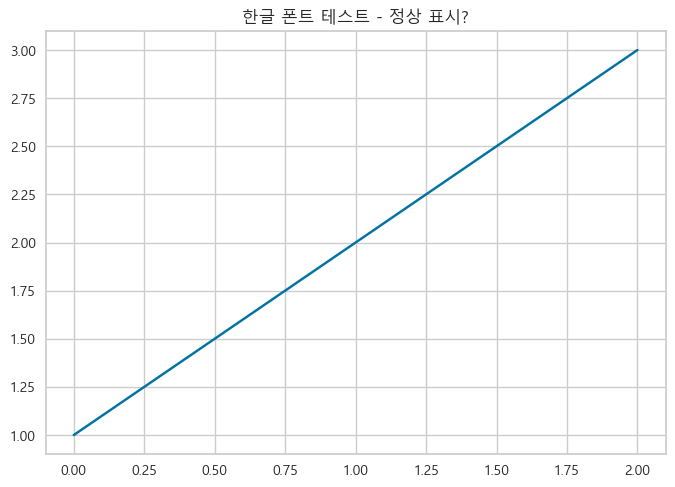

In [105]:
# 한글 세팅 참고 1
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import platform

# 1) 선호 폰트 후보(설치되어 있는 것 위주)
candidates = {
    "Windows": ["Malgun Gothic", "맑은 고딕"]
}

system = platform.system()
fonts_to_try = candidates.get(system, []) + ["NanumGothic"]  # 최후 fallback

# 2) 폰트가 실제로 있는지 검사 후 적용
available = set(f.name for f in fm.fontManager.ttflist)
for name in fonts_to_try:
    if name in available:
        mpl.rcParams["font.family"] = name
        break

# 3) 마이너스 깨짐 방지
mpl.rcParams["axes.unicode_minus"] = False

# 테스트
plt.plot([1,2,3])
plt.title("한글 폰트 테스트 - 정상 표시?")
plt.show()

In [ ]:
# # 한글 세팅 참고 2

# import matplotlib.pyplot as plt
# from matplotlib import rcParams

# # Windows용 폰트 설정 (예: Malgun Gothic)
# rcParams['font.family'] = 'Malgun Gothic'
# rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# # 지수표현(소수점 2자리까지 나타내기)
# pd.options.display.float_format = '{:.2f}'.format

# # 확인용 그래프
# plt.plot([1, 2, 3], [3, 2, 1])
# plt.title("한글 폰트 테스트")
# plt.xlabel("가로축")
# plt.ylabel("세로축")
# plt.show()

In [86]:
# [문제 1~2] 스케일링 한 데이터 불러오기
# 1. data 변수에 'data_sc.csv' 파일을 불러와서 할당
# 2. data 변수 호출해서 상위 5개 확인해보기

data = pd.read_csv('data_sc.csv')
data.head()
#[참고] colab으로 진행할 때 
#data = pd.read_csv(path+'customers_seg.csv')

,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
0,-0.070427,-1.295136,-0.810943,-0.313685,-0.366062,-1.242413,-0.472671,-0.597243,0.265939,-0.340235,-0.318628
1,-1.853401,0.772120,-0.325638,-0.313685,-0.366062,1.511484,-0.472671,1.674362,-1.342270,-0.340235,-0.318628
2,-0.961914,-1.295136,-0.504656,-0.313685,-0.366062,-0.649289,-0.943792,1.674362,-0.483815,-0.340235,-0.318628
3,1.712546,0.772120,0.600217,3.187913,-0.366062,0.137715,0.234009,-0.597243,2.030230,2.939142,-0.318628
4,0.821059,0.772120,0.119108,-0.313685,2.731780,-0.524540,0.469570,-0.597243,1.146690,-0.340235,-0.318628


## **(2) 군집분석**

<b>군집분석을 위해 최적의 그룹 k 값을 찾아보고 최적의 군집 수를 결정해 보자

### <b>**1) 기본 셋팅**
* yellowbrick을 임포트 해서 군집분석 해보기

In [ ]:
#[같이 하기] yellowbrick이 없는 경우 pip로 설치해 주기(!pip install yellowbrick)

!pip install yellowbrick

In [87]:
# [같이 하기] k-means, yellowbrick의 KElbowVisualizer 불러오기

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

### <b>**2) 직접 하나하나 해보기**
* 몇 개의 그룹으로 군집화를 할지 k 값을 바꿔 가면서 '최적의 k 값'을 찾아보는 것을 해보자.

In [88]:
# [같이 하기] 군집화할 그룹(k) 결정하기

# 우리는 먼저 몇개의 그룹으로 군집화 할지 3~10까지 수 중에서 결정하려고 3부터 2씩 올려서 클러스터링을 해보려고 한다.
# 그러면 3개의 그룹부터 시작해 보자.


# 1.몇개의 그룹(k)으로 군집화 할지 임의로 정해보기(k에 할당)
k=3

# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용)
# 동일값을 위해 random_state=2025, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init 지정 : warning을 없애기 위해 지정해준다.

model_1 = KMeans(n_clusters=k, random_state=2025,n_init=10)

#3. 스케일링 된 데이터에 학습

model_1.fit(data)


,n_clusters,3
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,2025
,copy_x,True
,algorithm,'lloyd'


In [89]:
# [같이 하기] 모델이 찾은 3개의 센트로이드를 확인해보자.
# 센트로이드는 하나의 클러스터(k) 내 데이터의 중심이 되는 점이다.

model_1.cluster_centers_

array([[ 4.91209295e-01, -1.86052996e-02,  9.62935389e-01,
         3.83716786e-01,  3.14947262e-02, -9.89694590e-02,
         1.96321817e+00,  2.17695394e-02,  1.32727947e+00,
        -9.56484995e-03,  2.78122449e+00],
       [-1.79328857e-02,  7.72119935e-01, -8.48604407e-02,
        -4.13497939e-02,  6.59720852e-02,  6.26869027e-01,
        -2.29706328e-01, -3.86311266e-03, -3.88547151e-01,
        -1.83956795e-02, -3.04852679e-01],
       [-1.16286759e-01, -1.29462185e+00, -1.44261461e-01,
        -4.47996867e-02, -1.20482237e-01, -1.02606888e+00,
        -1.98651027e-01,  1.31719920e-05,  2.58464247e-01,
         3.38287635e-02, -3.16050607e-01]])

In [90]:
# [같이 하기] 3가지 성능지표를 통해서 확인해보기

# 1. inertia(이너셔) : 각 데이터와 센트로이드(중심) 사이의 평균 제곱거리로 도출한 모델 (model.inertia_로 쓴다)
# 2. score 매서드: 이너셔의 음수값을 반환( model.score(df))

print(model_1.inertia_)
print(model_1.score(data))

93558.90153906902
-93558.90153906902


<b> k=3을 같이 해봤으니 이제 여러분들이 한번 그룹수(k)를 바꿔가면서 판단을 해보실 차례입니다!
<br>2씩 늘려가면서 k값을 5,7,9개의 그룹으로 나눠서 모델 학습 시키고 성능지표를 확인해 보세요!

In [91]:
#[문제 3] 군집화할 그룹(k)을 5개로 해보자.

# 1.몇개의 그룹(k)으로 군집화 할지 임의로 정해보기(k1에 할당)
k1=5

# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용) (model_2 에 할당)
# 동일값을 위해 random_state=2025, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init 지정 : warning을 없애기 위해 지정해준다.

model_2 = KMeans(n_clusters=k1, random_state=2025, n_init=10)

#3. 스케일링 된 데이터에 학습

model_2.fit(data)

#4. 학습한 결과 inertia,score 로 확인 해보기

print(model_2.inertia_)
print(model_2.score(data))

74060.0539903439
-74060.0539903439


In [92]:
#[문제 4] 군집화할 그룹(k)을 7개로 해보자.

# 1.몇개의 그룹(k)으로 군집화 할지 임의로 정해보기(k2에 할당)

k2=7

# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용) (model_3 에 할당)
# 동일값을 위해 random_state=2025, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init 지정 : warning을 없애기 위해 지정해준다.

model_3 = KMeans(n_clusters=k2, random_state=2025, n_init=10)

#3. 스케일링 된 데이터에 학습

model_3.fit(data)

#4. 학습한 결과 inertia,score 로 확인 해보기

print(model_3.inertia_)
print(model_3.score(data))

60263.5162337401
-60263.5162337401


In [93]:
#[문제 5] 군집화할 그룹(k)을 9개로 해보자.

# 1.몇개의 그룹(k)으로 군집화 할지 임의로 정해보기(k3에 할당)

k3=9

# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용) (model_4 에 할당)
# 동일값을 위해 random_state=2025, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init 지정 : warning을 없애기 위해 지정해준다.

model_4 = KMeans(n_clusters=k3, random_state=2025, n_init=10)

#3. 스케일링 된 데이터에 학습

model_4.fit(data)

#4. 학습한 결과 inertia,score 로 확인 해보기

print(model_4.inertia_)
print(model_4.score(data))

53248.239921635526
-53248.239921635526


-----------

* <b>for 문을 활용해서 그래프로도 확인을 해볼까요?

n_cluster:2, inertia:110875.68041316455
---------
n_cluster:3, inertia:93558.90153906902
---------
n_cluster:4, inertia:83453.68681059695
---------
n_cluster:5, inertia:74060.0539903439
---------
n_cluster:6, inertia:66665.67312126086
---------
n_cluster:7, inertia:60263.5162337401
---------
n_cluster:8, inertia:56978.148417056254
---------
n_cluster:9, inertia:53248.239921635526
---------
n_cluster:10, inertia:50603.09346179726
---------
n_cluster:11, inertia:48751.3848650262
---------
n_cluster:12, inertia:46241.183028443054
---------
n_cluster:13, inertia:44209.198153010366
---------
n_cluster:14, inertia:42661.76625642237
---------
n_cluster:15, inertia:41064.04436607587
---------
n_cluster:16, inertia:39567.08557005088
---------
n_cluster:17, inertia:38802.208615130105
---------
n_cluster:18, inertia:37494.07937045378
---------
n_cluster:19, inertia:36252.97943772257
---------
n_cluster:20, inertia:35128.762616383574
---------


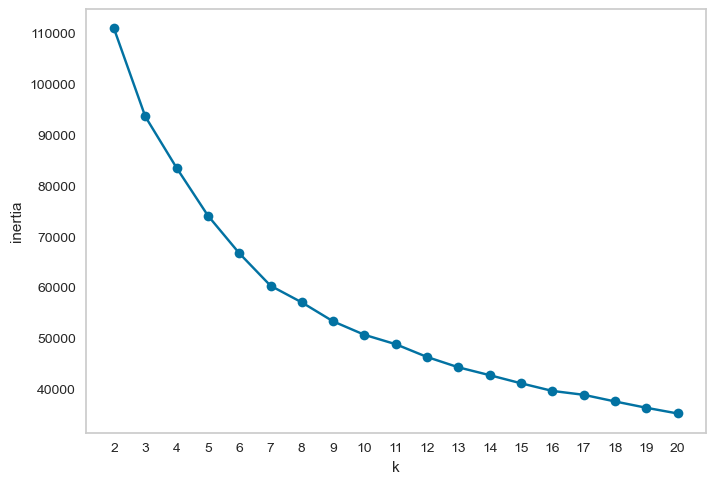

In [94]:
#[문제 6] for 문을 활용해서 2~20까지 k값을 넣어서 성능지표 확인하기

ks= range(2, 21)          # k값 범위 지정(range 활용) 후 ks 변수에 할당
inertias = []  # 이너셔 결과를 저장하기 위한 빈 리스트 생성 (변수명 inertias)

for i  in ks : # for문 활용
    # k-means 모델 만들기(그룹수 : n_clusters 파라미터 사용,n_init=10)
    model = KMeans(n_clusters=i, random_state=2025, n_init=10)
    # 모델 학습
    model.fit(data)
    # 이너셔 결과를 inertias 리스트에 계속 저장(append 활용)
    inertias.append(model.inertia_)
                        
    print('n_cluster:{}, inertia:{}'.format(i, model.inertia_))
    print('---------') # n_cluster, inertia 결과 출력

plt.Figure(figsize=(15,6))
plt.plot(ks,inertias,'-o') # '-o'는 실선과 원을 같이 시각화
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.grid()
plt.show()

여기서는 확실하게 어떤 k 값이 좋은지 파악하기가 힘들긴 하네요

### <b>**3) Elbow Method 활용해서 k 값 구하기**
* yellowbrick의 k-Elbow Mehod를 활용해서 최적의 k 값을 구하기(k값 결정하기 쉽게 도와주는 함수)

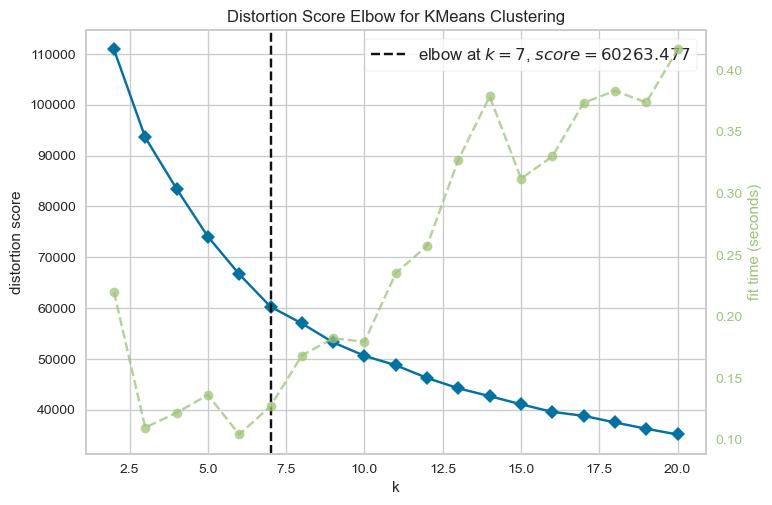

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [95]:
#[문제 7] Elbow Method를 통해 최적의 군집 수 도출을 해보자.

# 1. 모델 선언하기(random_state=2025, n_init = 10 으로 설정)(model_E로 할당)

model_E = KMeans(random_state=2025, n_init=10)

# 2. KElbowVisualizer 에 k-means 모델과 k값 넣어서 만들기(Elbow_M 에 할당)
# k값은 k=(2,21)사이의 값중에서 찾는 것으로 넣으면 된다.
Elbow_M = KElbowVisualizer(model_E, k=(2, 21))

# 3. Elbow 모델 학습하기(fit)

Elbow_M.fit(data)

# 4. Elbow 모델 확인하기(show()활용)
Elbow_M.show()

### <b>**4) 최적의 k 값으로 모델링**
* Elbow Method를 통해 나온 최적의 k값으로 모델링을 해보자.

In [96]:
# [문제 8] 원본 데이터('customers_seg.csv') 불러오기

# 1. scale이 안된 원본 data에 clust를 맵핑 시키기 위해 원본 데이터('customers_seg.csv')도 불러옵시다
# data0 라는 변수에 할당하기
data0 = pd.read_csv('customers_seg.csv')

# 2. 'CID'는 활용하지 않을 예정으로 삭제합니다.

data0.drop('CID', axis=1, inplace=True)

# 3. 데이터 상위 5개 확인하기
data0.head()

,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,지역,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,도시근교,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,시골,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,도시근교,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,도시근교,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,4,계약자,고용,0,9.776436,0,기본,석사,26820200,도시근교,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


In [97]:
# [문제 9] 최적의 k 값으로 k-means 모델을 구성해보자.

#1.최적의 k 값으로 군집 수 선택 (k4에 할당)
k4=7

# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용) (model_B 에 할당)
# 동일값을 위해 random_state=2025, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init의 기본 값이 10 이나 warning을 없애기 위해 지정해준다.

model_B = KMeans(n_clusters=k4, random_state=2025, n_init=10)

#3. 스케일링 된 데이터에 학습

model_B.fit(data)

#4. 클러스터링 된 결과 각 데이터가 몇번째 그룹에 속하는지 확인 및 저장(.predict)

cluster = model_B.predict(data)


In [98]:
# [문제 10] 예측결과와 원본 데이터 합치기

#1. 예측 결과를 데이터프레임으로 만들고

cluster = pd.DataFrame(cluster, columns = ['cluster'])


#2. 원본 데이터와 합쳐서, result로 저장 --> ()안에 작성해보기!

result = pd.concat([data0, cluster], axis=1)

#3. 예측 결과는 카테고리 타입으로 변경
result['cluster'] = pd.Categorical(result['cluster'])
result.head()

#4. 결과 저장 --> 코드 마무리!
result.to_csv('cluster_result.csv', index=False)


<b> 각 고객별로 군집 된 번호가 데이터 프레임에 생성한 것을 볼 수 있습니다! 다 왔습니다!

* 이제부터 조별 과제를 수행합니다.
    * 조 내에서 최적의 K값으로 군집을 수행한 결과(result)를 하나 선정해서
    * 모든 조원들이 동일한 데이터를 로딩하고
    * 프로파일링을 시작합니다.


---------------------------------------------------------------------------------------------
# **2. 프로파일링**

<b>프로파일링 이란?
> <b>군집의 구조와 내용을 분석하고 도메인 및 현업업무의 '추론'을 바탕으로 분석의 결과를 적용 가능하도록 하는 과정. 데이터를 통해서 군집별 특성을 파악하는 것에 목적은 두는 기법

<font color="1E90FF"><b>★ 프로파일링을 위해 군집간의 차이를 도메인 및 업무 관점으로 해석해야한다.</font>

* 우리는 총 20개의 컬럼을 clust 별로 업무관점으로 해석하고 정리가 필요하다.
  <br>* 범주형/수치형 데이터 별로도 특징과 해석방법이 조금 다르다
  <br>* [선택] 개인별로 대략 6개 이상 변수에 대한 군집간 차이 분석해보기!(하나의 변수당 2명 이상이 분석 수행해야 비교가 된다!)

* 도메인 지식을 총 동원 해서 각 컬럼의 clust 별 인사이트를 도출 해 보자!

## **(1) 컬럼 확인해보기**

In [99]:
#[문제 11~12] result에 대해 info를 통해서 범주형/수치형 데이터 확인해보고 어떤 컬럼들이 있었는지 확인
# 1. 데이터 불러오기(조에서 하나의 결과를 선정해서 공유)

final_df = pd.read_csv('cluster_result.csv')
# 2. info로 확인하기
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGE                      12000 non-null  int64  
 1   등록(계/피)                  12000 non-null  object 
 2   고용상태                     12000 non-null  object 
 3   성별                       12000 non-null  int64  
 4   Willingness to pay/Stay  12000 non-null  float64
 5   갱신                       12000 non-null  int64  
 6   상품타입                     12000 non-null  object 
 7   교육수준                     12000 non-null  object 
 8   소득                       12000 non-null  int64  
 9   지역                       12000 non-null  object 
 10  결혼여부                     12000 non-null  object 
 11  월 납입액                    12000 non-null  int64  
 12  VOC                      12000 non-null  int64  
 13  타 상품 보유 현황               12000 non-null  object 
 14  온라인방문빈도               

<b>cluster 컬럼을 제외하고 그 다음 컬럼인 age 부터 차례대로 군집간의 차이를 업무관점으로 해석해 보기!

[tip]
* 범주형으로 되어있는 컬럼과 수치형으로 되어있는 컬럼이 해석하는 방법이 다르다.
  - 범주형 변수 -> ```crosstab``` (빈도/비율 중심)
  - 수치형 변수 => ```groupby + agg``` (통계 요약 중심)
* 컬럼이 어떤 컬럼인지 확인해보고 특징들을 파악해보자.

In [100]:
final_df.describe()

,AGE,성별,Willingness to pay/Stay,갱신,소득,월 납입액,VOC,총지불금액,cluster
count,12000.000000,12000.000000,12000.000000,12000.000000,1.200000e+04,12000.000000,12000.000000,1.200000e+04,12000.000000
mean,3.079000,0.487583,8.859478,0.143000,4.641737e+07,100.065833,0.390167,5.355854e+05,2.847500
std,1.121768,0.499867,7.698885,0.350087,3.736221e+07,42.453750,0.919605,3.587993e+05,1.800004
min,1.000000,0.000000,2.045730,0.000000,0.000000e+00,60.000000,0.000000,0.000000e+00,0.000000
25%,3.000000,0.000000,4.373400,0.000000,0.000000e+00,70.000000,0.000000,3.360000e+05,1.000000
50%,3.000000,0.000000,6.384831,0.000000,4.186240e+07,90.000000,0.000000,4.740000e+05,3.000000
75%,4.000000,1.000000,9.867900,0.000000,7.664150e+07,120.000000,0.000000,6.790000e+05,4.000000
max,6.000000,1.000000,92.496300,1.000000,1.320209e+08,350.000000,5.000000,3.573000e+06,6.000000


----------

### **1) AGE**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
AGE,,,,,,,,,,,,,,,,
1,149,0,88,1017,0,177,23,1454,0.138,0.000,0.093,0.64,0.000,0.164,0.024,0.121
2,142,480,108,572,0,163,73,1538,0.132,0.159,0.114,0.36,0.000,0.151,0.075,0.128
3,484,2223,337,0,980,367,384,4775,0.449,0.736,0.354,0.00,0.297,0.340,0.393,0.398
4,250,316,220,0,1767,308,263,3124,0.232,0.105,0.231,0.00,0.535,0.285,0.269,0.260
5,54,0,187,0,547,64,205,1057,0.050,0.000,0.197,0.00,0.166,0.059,0.210,0.088
6,0,0,11,0,11,1,29,52,0.000,0.000,0.012,0.00,0.003,0.001,0.030,0.004
All,1079,3019,951,1589,3305,1080,977,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


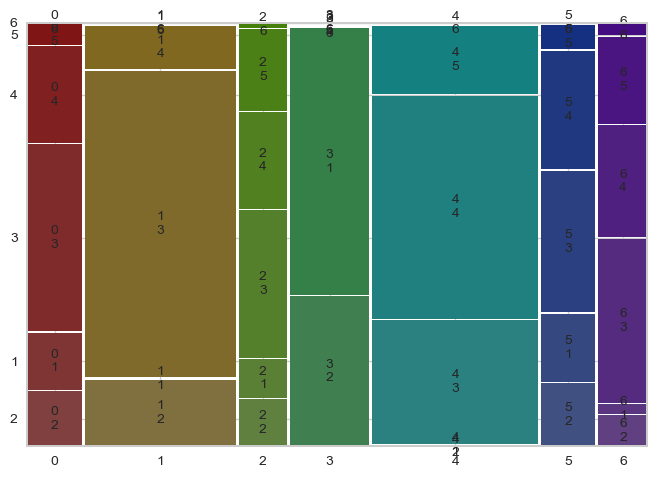

In [101]:
# [같이 하기] 'Age' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.
# crosstab의 margins='True'을 활용하면 행 합, 열 합을 추가할 수 있다.
# pro_df 변수에 할당해서 확인해보자.

feature = 'AGE'

# 교차표(crosstab)로 합계 확인: 각 나이대가 몇 건씩 속해 있는지 빈도(합계)를 보여줌
pro_df1_1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.
pro_df1_2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df1_2 = pro_df1_2.round(3)

# 합치기, concat: 빈도표(pro_df1_1)와 비율표(pro_df1_2)를 옆으로 붙임
pro_df1 = pd.concat([pro_df1_1, pro_df1_2], axis=1)

# pro_df1 확인
display(pro_df1)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), ['cluster', feature])
plt.show()

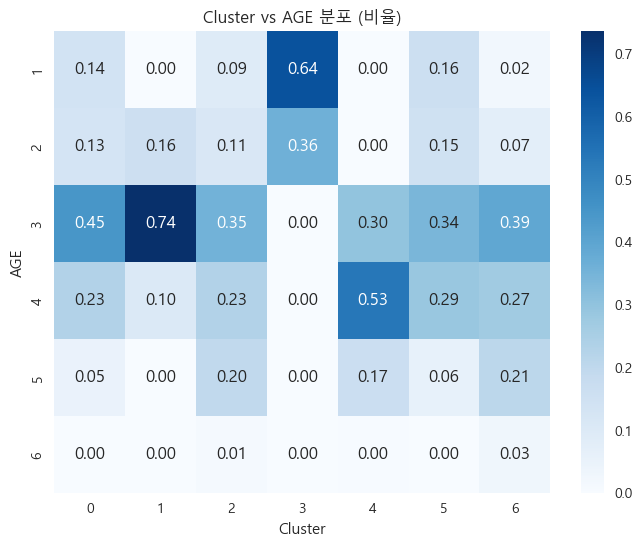

In [106]:
# 히트맵으로 시각화하기
# 교차표 생성 (비율 기준)
crosstab = pd.crosstab(result['AGE'], result['cluster'], normalize='columns')

# Heatmap 시각화
plt.figure(figsize=(8,6))
sns.heatmap(crosstab, annot=True, fmt=".2f", cmap="Blues")
plt.title("Cluster vs AGE 분포 (비율)")
plt.ylabel("AGE")
plt.xlabel("Cluster")
plt.show()

<b>**'age' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

1. 클러스터별 주요 연령대 파악
   -  cluster 0 : AGE=3(40대)이 484명(44.9%), AGE=4(50대)가 250명(23.2%) => 주로 40~50대 중심
   -  cluster 1 : AGE=3(40대)이 2,223명(73.6%), AGE=2(30대)가 480명(15.9%), AGE=4(50대)가 316명(10.5%) => 거의 40대 위주
   -  cluster 2 : AGE=3(40대)이 337명(35.4%), AGE=4(50대)이 220명(23.1%), AGE=5가 187명(19.7%) => 30~50대 혼합
   -  cluster 3 : AGE=1(20대)이 1,017명(64%), AGE=2(30대)가 572명(36%) => **젊은 층 중심**
   -  cluster 4 : AGE=4(50대)가 1,767명(53.5%), AGE=3(40대)이 980명(29.7%), AGE=5(60대)가 547명(16.6%) => **50대 중심으로 중장년층 중심**
   -  cluster 5 : AGE=3(40대)이 367명(34%), AGE=4(50대)가 308명(28.5%), AGE=1(20대)이 177명(16.4%) => 40~50대 중심, 일부 20대 젊은 층
   -  cluster 6 : AGE=3(40대)이 384명(39.3%), AGE=5(60대)가 205명(21%), AGE=4(50대)가 263명(26.9%) => 40~60대 혼합

2. 전체 분포 (All 열)
    - AGE=3(40대)이 전체 4,775명(39.8%)으로 전체 데이터에서 가장 큰 연령대
    - AGE=4(50대)가 3,124명(26%)으로 두 번째로 많음
    - AGE=1(20대), AGE=2(30대)는 각각 12%, 13% 수준
    - AGE=5(60대)는 8.8%, AGE=6(70대)는 거의 없음

3. 요약
    - cluster 1은 40대가 압도적으로 많음
    - cluster 3은 20~30대로 구성되어 있음
    - cluster 4는 cluster 3과 반대로 50대를 중심으로 한 중장년층으로 구성되어 있음
    - cluster 5는 40~50대 중심이지만 20대 젊은 층도 비중을 차지하고 있음
    - 특정 케이스를 제외하고는 전반적으로 40~50대가 많이 분포되어 있음


### **2) 등록(계/피)**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
등록(계/피),,,,,,,,,,,,,,,,
계약자,852,2388,747,1225,2570,875,768,9425,0.79,0.791,0.785,0.771,0.778,0.81,0.786,0.785
피보험자,227,631,204,364,735,205,209,2575,0.21,0.209,0.215,0.229,0.222,0.19,0.214,0.215
All,1079,3019,951,1589,3305,1080,977,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


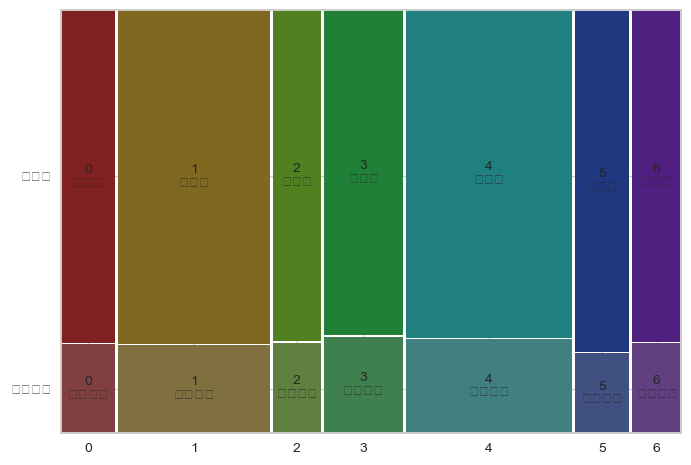

In [103]:
# [문제 13] '등록(계/피)' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '등록(계/피)'

# 교차표(crosstab)로 합계 확인: 각 등록(계/피)이 몇 건씩 속해 있는지 빈도(합계)를 보여줌
pro_df2_1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.
pro_df2_2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df2_2 = pro_df2_2.round(3)

# 합치기, concat: 빈도표(pro_df2_1)와 비율표(pro_df2_2)를 옆으로 붙임
pro_df2 = pd.concat([pro_df2_1, pro_df2_2], axis=1)

# pro_df2 확인
display(pro_df2)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), ['cluster', feature])
plt.show()

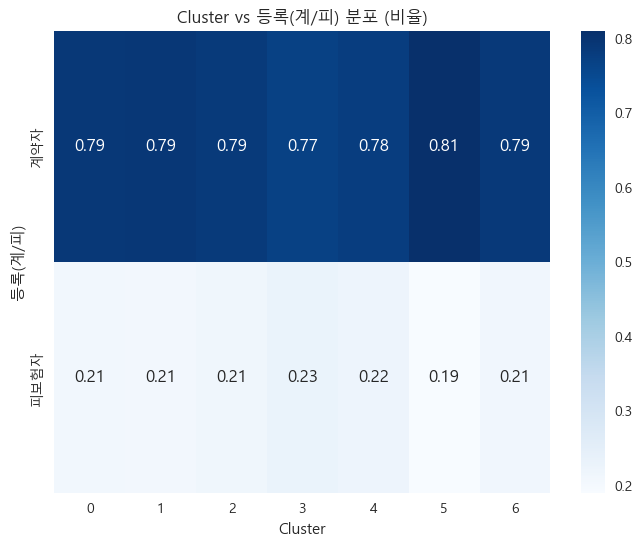

In [107]:
# 히트맵으로 시각화하기
# 교차표 생성 (비율 기준)
crosstab = pd.crosstab(result['등록(계/피)'], result['cluster'], normalize='columns')

# Heatmap 시각화
plt.figure(figsize=(8,6))
sns.heatmap(crosstab, annot=True, fmt=".2f", cmap="Blues")
plt.title("Cluster vs 등록(계/피) 분포 (비율)")
plt.ylabel("등록(계/피)")
plt.xlabel("Cluster")
plt.show()

<b>**'등록(계/피)' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

전체 분포 및 요약
- 등록자(12,000명) 중 계약자는 9,425명(78.5%), 피보험자는 2,575명(21.5%)
- 클러스터 전체가 계약자가 피보험자보다 수가 많음

### **3) 성별**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
성별,,,,,,,,,,,,,,,,
0,596,1509,486,816,1710,553,479,6149,0.552,0.5,0.511,0.514,0.517,0.512,0.49,0.512
1,483,1510,465,773,1595,527,498,5851,0.448,0.5,0.489,0.486,0.483,0.488,0.51,0.488
All,1079,3019,951,1589,3305,1080,977,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


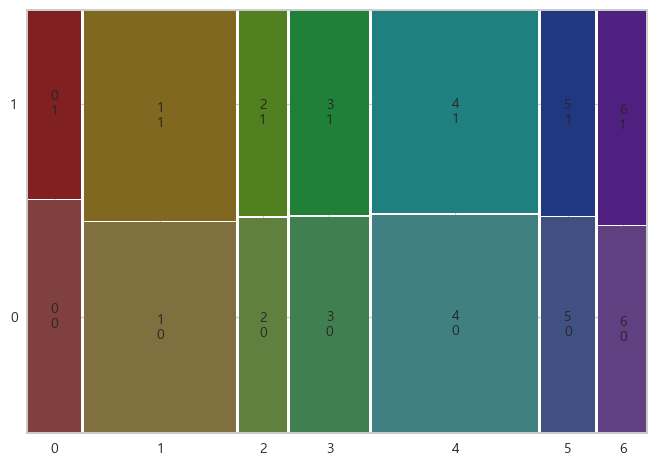

In [108]:
# [문제 15] '성별' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '성별'

# 교차표(crosstab)로 합계 확인: 각 성별이 몇 건씩 속해 있는지 빈도(합계)를 보여줌
pro_df3_1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.
pro_df3_2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df3_2 = pro_df3_2.round(3)

# 합치기, concat: 빈도표(pro_df3_1)와 비율표(pro_df3_2)를 옆으로 붙임
pro_df3 = pd.concat([pro_df3_1, pro_df3_2], axis=1)

# pro_df3 확인
display(pro_df3)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), ['cluster', feature])
plt.show()

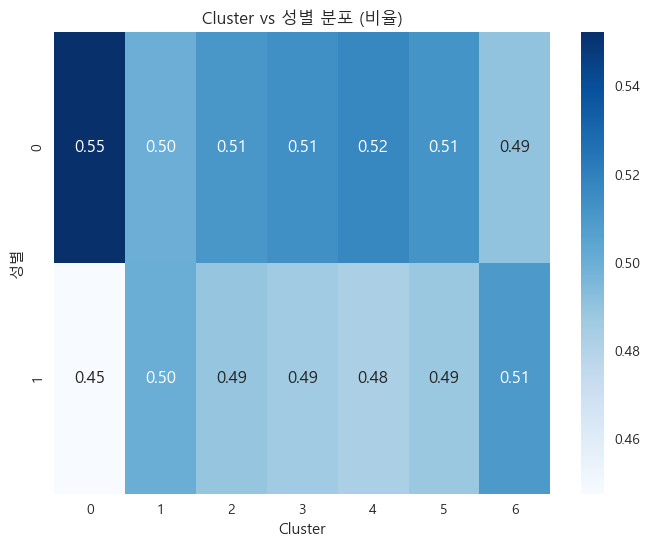

In [109]:
# 히트맵으로 시각화하기
# 교차표 생성 (비율 기준)
crosstab = pd.crosstab(result['성별'], result['cluster'], normalize='columns')

# Heatmap 시각화
plt.figure(figsize=(8,6))
sns.heatmap(crosstab, annot=True, fmt=".2f", cmap="Blues")
plt.title("Cluster vs 성별 분포 (비율)")
plt.ylabel("성별")
plt.xlabel("Cluster")
plt.show()

<b>**'성별' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

전체 분포 및 요약
- 여성(0), 남성(1)
- 클러스터 1과 클러스터 4에 사람이 많음

클러스터별 분석
- cluster 0: 여성 비중이 55%로 더 높음
- cluster 1: 1:1로 성비가 똑같음
- cluster 2: 여성 비중이 51%로 약간 더 높음
- cluster 3: 여성 비중이 51%로 약간 더 높음
- cluster 4: 여성 비중이 52%로 약간 더 높음
- cluster 5: 여성 비중이 51%로 약간 더 높음
- cluster 6: 남성 비중이 51%로 약간 더 높음

### **4) willingness to pay/stay(수치)**

Willingness to pay/Stay                                
                            max       min       mean     median
cluster                                                        
0                       51.7371  2.088798   7.529804   5.794200
1                       49.6947  2.045730   7.684331   5.672100
2                       65.2125  3.518700  11.628994   9.421125
3                       54.8562  2.465643   8.100172   6.193800
4                       52.3476  2.508600   8.079869   6.160500
5                       49.7946  2.444109   8.223399   6.010650
6                       92.4963  3.407700  15.838785  11.233200

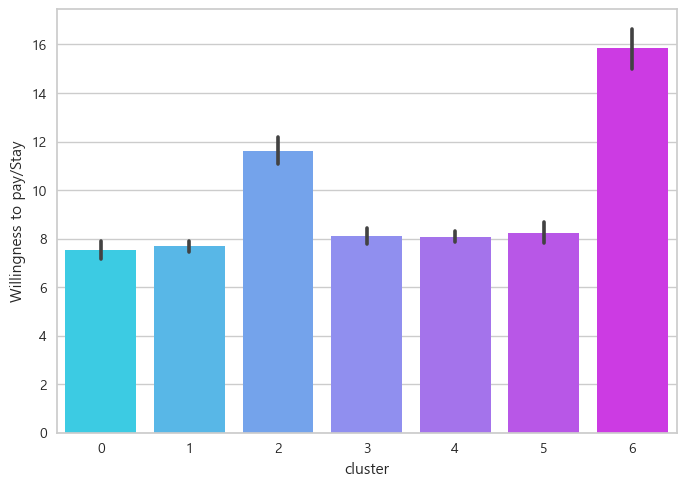

In [110]:
# [같이 하기] WTP의 경우 '보험 유지 기대 확률'로 각 clust 별 min,max,mean,median 통계 값으로 확인해보자.
# groupby 와 agg() 메소드를 활용하여 도출해 보자.

feature = 'Willingness to pay/Stay'
display(result[['cluster',feature]].groupby(['cluster']).agg(['max','min','mean','median']))
# 추후 변경 권장
# result[['cluster', feature]].groupby(['cluster'], observed=False).agg(['max','min','mean','median'])

# 시각화를 해 봅시다.
sns.barplot(x='cluster', y=feature, data=result, palette='cool')
# 추후 변경 권장
# sns.barplot(x='cluster', y=feature, data=result, hue='cluster', palette='cool', legend=False)
plt.show()


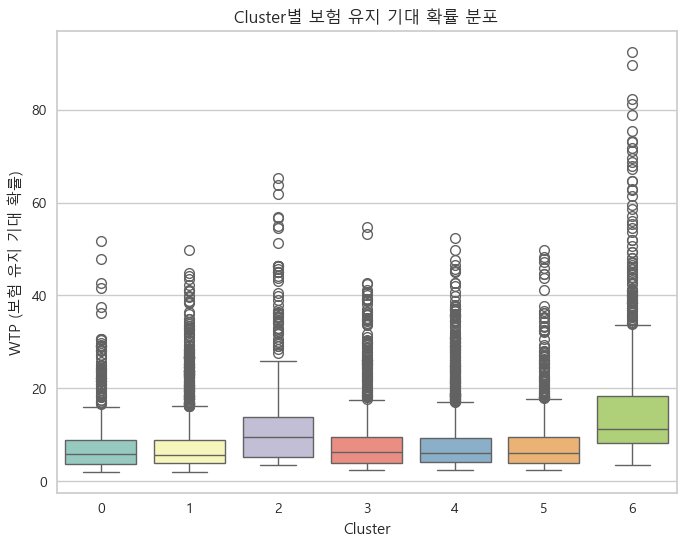

In [111]:
# Boxplot 시각화
plt.figure(figsize=(8,6))
sns.boxplot(x='cluster', y='Willingness to pay/Stay', data=result, palette="Set3")
plt.title("Cluster별 보험 유지 기대 확률 분포")
plt.xlabel("Cluster")
plt.ylabel("WTP (보험 유지 기대 확률)")
plt.show()

<b>**'WTP' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

클러스터별 분석
- cluster 0:
- cluster 1: 오차 막대가 상대적으로 짧음(WTP 값이 비교적 균일함)
- cluster 2: 막대가 2번째로 높음 => 보험 유지 확률이 높음, 오차 막대도 상대적으로 긺
- cluster 3:
- cluster 4: 오차 막대가 상대적으로 짧음(WTP 값이 비교적 균일함)
- cluster 5:
- cluster 6: 막대가 젤 높음 => 보험 유지 확률이 젤 높음, 오차 막대도 긺(고객들의 WTP 값이 다양하게 분포)

해석 안내
- x축: 클러스터 번호, y축: 보험 유지 기대 확률(WTP)
- 막대: 각 클러스터의 평균값
- 오차 막대: 기본적으로 95% 신뢰구간
- 막대가 높을수록(평균값이 클수록) 해당 클러스터 고객들의 보험 유지 확률이 높음
- 반대로 막대가 낮을수록 해당 클러스터 고객들의 유지 확률이 낮음
- 오차 막대가 짧으면 해당 클러스터 내 고객들의 WTP값이 비교적 균일함
- 오차 막대가 길면 클러스터 내 고객들의 WTP 값이 다양하게 분포

### **5) 상품 타입**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
상품타입,,,,,,,,,,,,,,,,
고급,1,0,951,0,0,0,123,1075,0.001,0.000,1.0,0.000,0.000,0.000,0.126,0.090
기본,699,2004,0,1123,2210,709,533,7278,0.648,0.664,0.0,0.707,0.669,0.656,0.546,0.606
중급,379,1015,0,466,1095,371,321,3647,0.351,0.336,0.0,0.293,0.331,0.344,0.329,0.304
All,1079,3019,951,1589,3305,1080,977,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


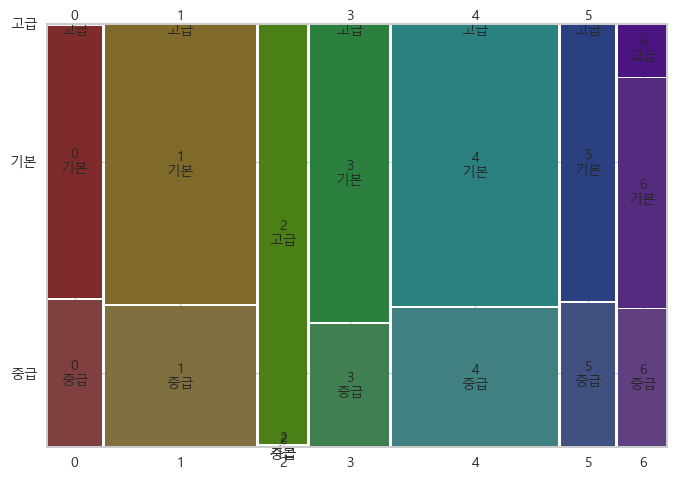

In [112]:
# [문제 17] '상품타입' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '상품타입'

# 교차표(crosstab)로 합계 확인: 각 상품타입이 몇 건씩 속해 있는지 빈도(합계)를 보여줌
pro_df4_1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.
pro_df4_2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df4_2 = pro_df4_2.round(3)

# 합치기, concat: 빈도표(pro_df4_1)와 비율표(pro_df4_2)를 옆으로 붙임
pro_df4 = pd.concat([pro_df4_1, pro_df4_2], axis=1)

# pro_df4 확인
display(pro_df4)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), ['cluster', feature])
plt.show()

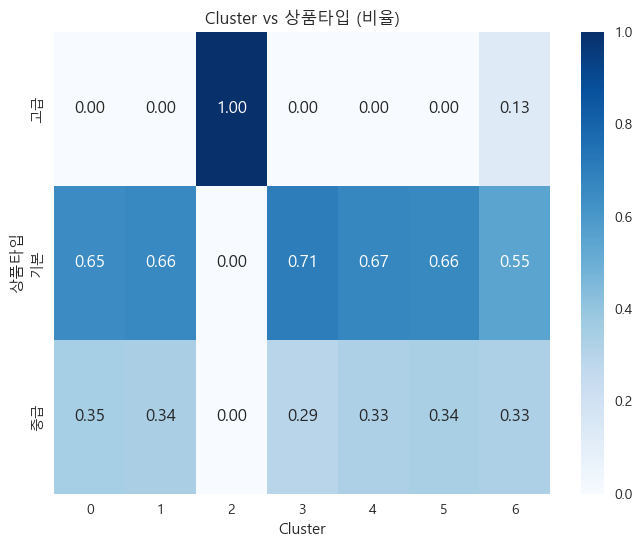

In [113]:
# 히트맵으로 시각화하기
# 교차표 생성 (비율 기준)
crosstab = pd.crosstab(result['상품타입'], result['cluster'], normalize='columns')

# Heatmap 시각화
plt.figure(figsize=(8,6))
sns.heatmap(crosstab, annot=True, fmt=".2f", cmap="Blues")
plt.title("Cluster vs 상품타입 (비율)")
plt.ylabel("상품타입")
plt.xlabel("Cluster")
plt.show()

<b>**'상품타입' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

클러스터별 분석
- cluster 0: 기본이 65%(699개), 중급이 35%(379개), 고급이 1개로 거의 없음
- cluster 1: 기본이 66%(2004개), 중급이 34%(1015개) 있고, 고급은 없음
- cluster 2: 고급만 있음(951개)
- cluster 3: 기본이 71%(1123개), 중급이 29%(466개) 있고, 고급은 없음
- cluster 4: 기본이 67%(2210개), 중급이 33%(1095개) 있고,고급은 없음
- cluster 5: 기본이 66%(709개), 중급이 34%(371개) 있고,고급은 없음
- cluster 6: 기본이 55%(533개), 중급이 33%(321개), 고급이 13%(123개) 있음

전체 분포 및 요약
- 클러스터 2에서는 고급 상품만 구매하였음 => 건강보험상품의 혜택을 많이 받고자 하는 니즈가 있음
- 클러스터 2를 제외한 나머지는 기본이 우세하며 클러스터 6을 제외하고는 고급 상품을 구매한 경우는 거의 없거나(클러스터 0) 아예 없음.

### **6) 교육수준**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
교육수준,,,,,,,,,,,,,,,,
고졸이하,333,1031,301,516,961,0,335,3477,0.309,0.342,0.317,0.325,0.291,0.000,0.343,0.290
대학졸업,602,1988,553,1073,2344,0,545,7105,0.558,0.658,0.581,0.675,0.709,0.000,0.558,0.592
박사,40,0,20,0,0,353,26,439,0.037,0.000,0.021,0.000,0.000,0.327,0.027,0.037
석사,104,0,77,0,0,727,71,979,0.096,0.000,0.081,0.000,0.000,0.673,0.073,0.082
All,1079,3019,951,1589,3305,1080,977,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


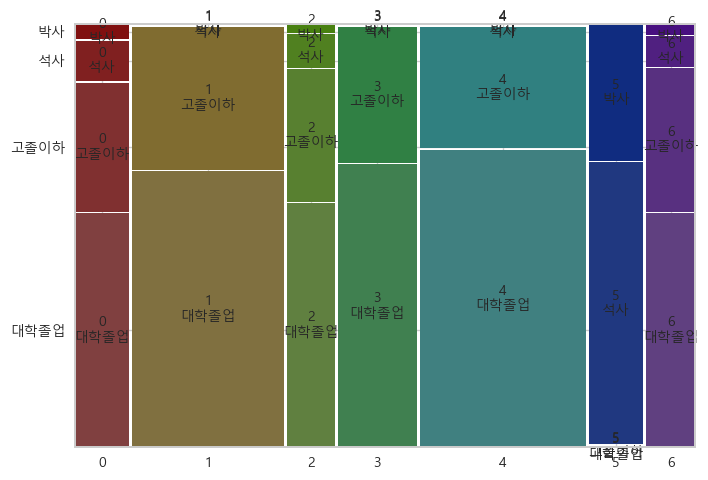

In [114]:
# [문제 19] '교육수준' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '교육수준'

# 교차표(crosstab)로 합계 확인: 각 교육수준이 몇 건씩 속해 있는지 빈도(합계)를 보여줌
pro_df5_1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.
pro_df5_2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df5_2 = pro_df5_2.round(3)

# 합치기, concat: 빈도표(pro_df5_1)와 비율표(pro_df5_2)를 옆으로 붙임
pro_df5 = pd.concat([pro_df5_1, pro_df5_2], axis=1)

# pro_df5 확인
display(pro_df5)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), ['cluster', feature])
plt.show()

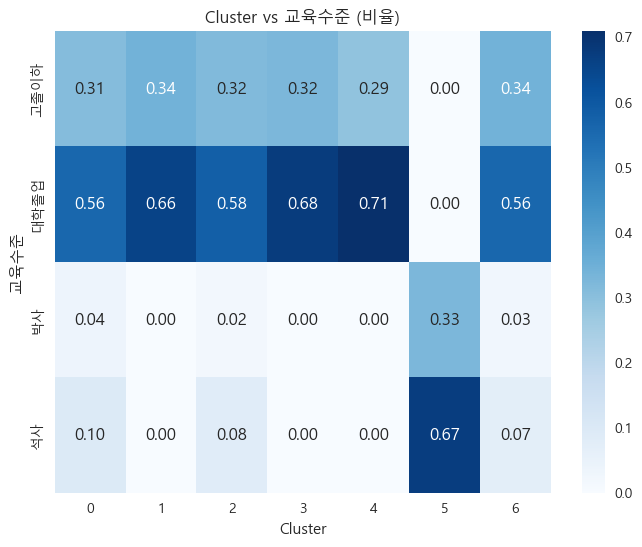

In [115]:
# 히트맵으로 시각화하기
# 교차표 생성 (비율 기준)
crosstab = pd.crosstab(result['교육수준'], result['cluster'], normalize='columns')

# Heatmap 시각화
plt.figure(figsize=(8,6))
sns.heatmap(crosstab, annot=True, fmt=".2f", cmap="Blues")
plt.title("Cluster vs 교육수준 (비율)")
plt.ylabel("교육수준")
plt.xlabel("Cluster")
plt.show()

<b>**'교육수준' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

클러스터별 분석
- cluster 0: 대졸이 56%(602명), 고졸 이하가 31%(333명), 석사가 10%(104명), 박사가 4%(40명) 있음
- cluster 1: 대졸이 66%(1988명), 고졸 이하가 34%(1988명) 있음
- cluster 2: 대졸이 58%(553명), 고졸 이하가 32%(301명), 석박사가 10% 있음
- cluster 3: 대졸이 68%(1073명), 고졸 이하가 32%(516명) 있음
- cluster 4: 대졸이 71%(2344명), 고졸 이하가 29%(961명) 있음
- cluster 5: 석사가 67%(727명), 박사가 33%(353명) 있음
- cluster 6: 대졸이 56%(545명), 고졸 이하가 34%(335명), 석박사가 10% 있음

### **7) 고용상태**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
고용상태,,,,,,,,,,,,,,,,
FALSE,39,255,6,0,0,27,33,360,0.036,0.084,0.006,0.0,0.0,0.025,0.034,0.030
고용,632,0,611,1589,3305,800,581,7518,0.586,0.000,0.642,1.0,1.0,0.741,0.595,0.626
무직,285,2089,233,0,0,139,282,3028,0.264,0.692,0.245,0.0,0.0,0.129,0.289,0.252
휴직,123,675,101,0,0,114,81,1094,0.114,0.224,0.106,0.0,0.0,0.106,0.083,0.091
All,1079,3019,951,1589,3305,1080,977,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


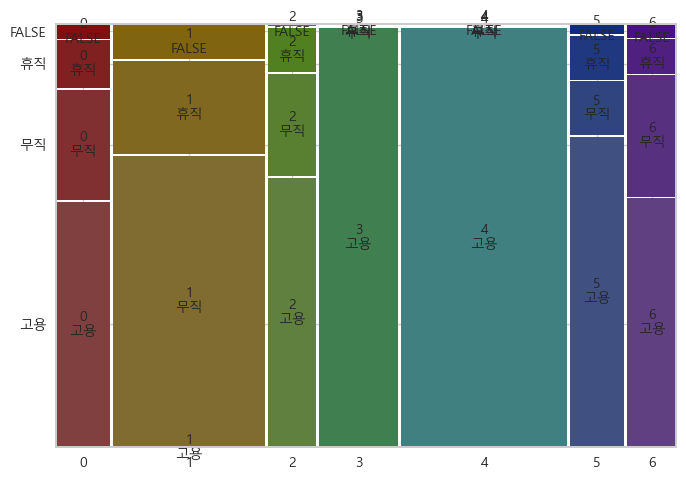

In [116]:
# [문제 21] '고용상태' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '고용상태'

# 교차표(crosstab)로 합계 확인: 각 고용상태가 몇 건씩 속해 있는지 빈도(합계)를 보여줌
pro_df6_1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.
pro_df6_2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df6_2 = pro_df6_2.round(3)

# 합치기, concat: 빈도표(pro_df6_1)와 비율표(pro_df6_2)를 옆으로 붙임
pro_df6 = pd.concat([pro_df6_1, pro_df6_2], axis=1)

# pro_df6 확인
display(pro_df6)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), ['cluster', feature])
plt.show()

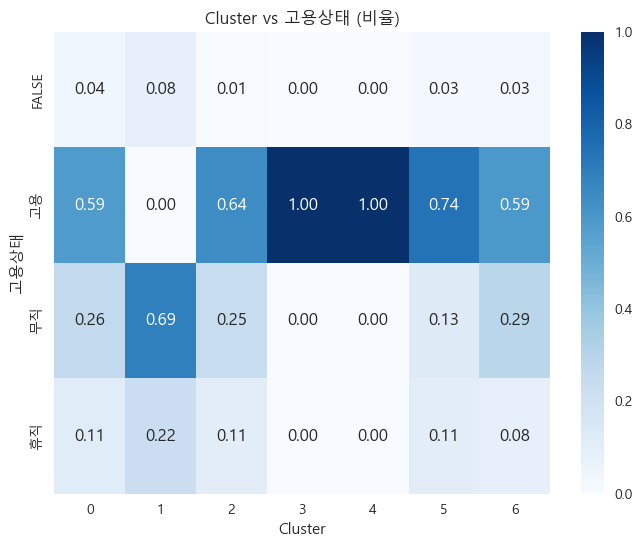

In [117]:
# 히트맵으로 시각화하기
# 교차표 생성 (비율 기준)
crosstab = pd.crosstab(result['고용상태'], result['cluster'], normalize='columns')

# Heatmap 시각화
plt.figure(figsize=(8,6))
sns.heatmap(crosstab, annot=True, fmt=".2f", cmap="Blues")
plt.title("Cluster vs 고용상태 (비율)")
plt.ylabel("고용상태")
plt.xlabel("Cluster")
plt.show()

<b>**'고용상태' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

클러스터별 분석
- cluster 0: 고용 상태가 59%(632명), 무직 상태가 26%(285명), 휴직 상태가 11%(123명), FALSE가 4%(39명)이다.
- cluster 1: 무직 상태가 69%(2089명), 휴직 상태가 22%(675명), FALSE가 8%(255명)이다.
- cluster 2: 고용 상태가 64%(611명), 무직 상태가 25%(233명), 휴직 상태가 11%(101명)이다.
- cluster 3: 고용 상태가 100%(1589명)이다.
- cluster 4: 고용 상태가 100%(3305명)이다.
- cluster 5: 고용 상태가 74%(800명), 무직 상태가 13%(139명), 휴직 상태가 11%(114명), FALSE가 3%(27명)이다.
- cluster 6: 고용 상태가 59%(581명), 무직 상태가 29%(282명), 휴직 상태가 8%(81명), FALSE가 3%(33명)이다.

전체 분포 및 요약
- **FALSE는 계약직이나 일용직, 프리랜서로 유추하고 있음 (조사해봐야 함), 아니면 그냥 결측치 대체인지 파악 필요**
- FALSE 데이터 수가 현저히 적기 때문에 데이터 분석이 큰 영향은 미치지 않는 것으로 보임

### **8) 소득(수치)**

소득                                     
               max       min          mean       median
cluster                                                
0        131727200         0  4.512578e+07   38944400.0
1         39601100         0  7.754090e+06          0.0
2        128243500         0  4.810864e+07   45389300.0
3        132020900  82386000  1.019033e+08  100976700.0
4         96421000  24045000  5.375149e+07   52485000.0
5        131674400         0  5.549815e+07   52768500.0
6        130366500         0  4.057909e+07   36072300.0

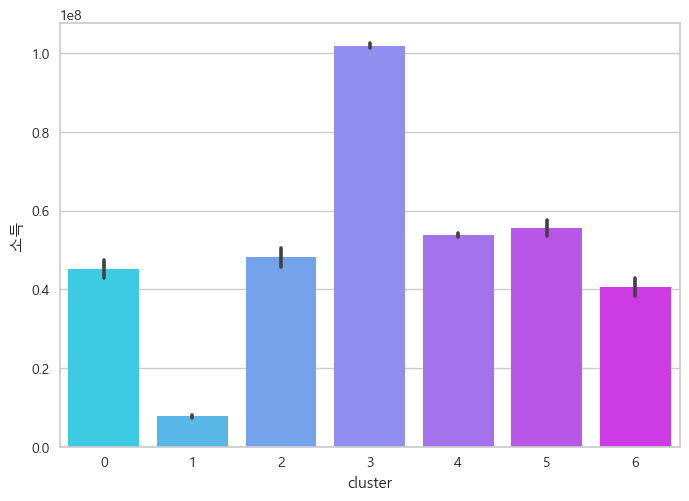

In [118]:
# [문제 23] '소득'은 수치형으로 각 clust 별 min,max,mean,median 통계 값으로 확인해보자.
# groupby 와 agg() 메소드를 활용하여 도출해 보자.

feature = '소득'
display(result[['cluster',feature]].groupby(['cluster']).agg(['max','min','mean','median']))
# 추후 변경 권장
# result[['cluster', feature]].groupby(['cluster'], observed=False).agg(['max','min','mean','median'])

# 시각화를 해 봅시다.
sns.barplot(x='cluster', y=feature, data=result, palette='cool')
# 추후 변경 권장
# sns.barplot(x='cluster', y=feature, data=result, hue='cluster', palette='cool', legend=False)
plt.show()

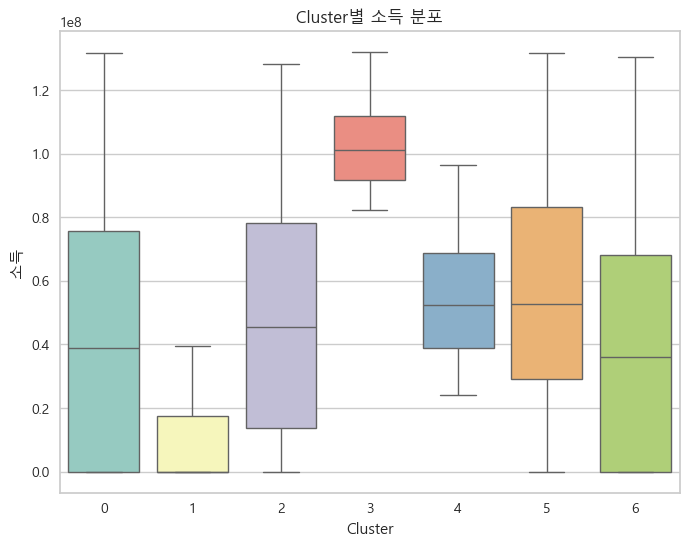

In [119]:
# Boxplot 시각화
plt.figure(figsize=(8,6))
sns.boxplot(x='cluster', y='소득', data=result, palette="Set3")
plt.title("Cluster별 소득 분포")
plt.xlabel("Cluster")
plt.ylabel("소득")
plt.show()

<b>**'소득' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

클러스터별 분석
- cluster 0:
- cluster 1:
- cluster 2:
- cluster 3:
- cluster 4:
- cluster 5:
- cluster 6:

전체 분포 및 요약

### **9) 결혼여부**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
결혼여부,,,,,,,,,,,,,,,,
기혼,676,1187,570,1073,2230,702,519,6957,0.627,0.393,0.599,0.675,0.675,0.65,0.531,0.58
미혼,403,1832,381,516,1075,378,458,5043,0.373,0.607,0.401,0.325,0.325,0.35,0.469,0.42
All,1079,3019,951,1589,3305,1080,977,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


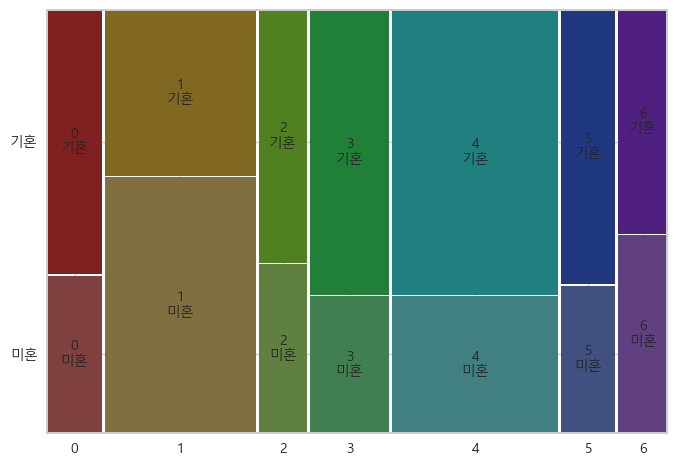

In [120]:
# [문제 25] '결혼여부' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '결혼여부'

# 교차표(crosstab)로 합계 확인: 각 결혼여부가 몇 건씩 속해 있는지 빈도(합계)를 보여줌
pro_df7_1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.
pro_df7_2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df7_2 = pro_df7_2.round(3)

# 합치기, concat: 빈도표(pro_df7_1)와 비율표(pro_df7_2)를 옆으로 붙임
pro_df7 = pd.concat([pro_df7_1, pro_df7_2], axis=1)

# pro_df7 확인
display(pro_df7)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), ['cluster', feature])
plt.show()

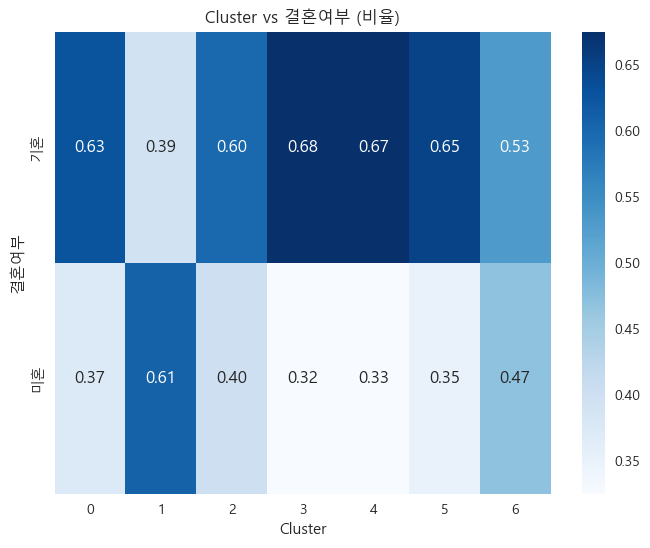

In [121]:
# 히트맵으로 시각화하기
# 교차표 생성 (비율 기준)
crosstab = pd.crosstab(result['결혼여부'], result['cluster'], normalize='columns')

# Heatmap 시각화
plt.figure(figsize=(8,6))
sns.heatmap(crosstab, annot=True, fmt=".2f", cmap="Blues")
plt.title("Cluster vs 결혼여부 (비율)")
plt.ylabel("결혼여부")
plt.xlabel("Cluster")
plt.show()

<b>**'결혼여부' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

클러스터별 분석
- cluster 0: 기혼 상태가 63%(676명), 미혼 상태가 37%(403명)이다.
- cluster 1: 미혼 상태가 61%(1832명), 기혼 상태가 39%(1187명)이다.
- cluster 2: 기혼 상태가 60%(570명), 미혼 상태가 40%(381명)이다.
- cluster 3: 기혼 상태가 68%(1073명), 미혼 상태가 32%(516명)이다.
- cluster 4: 기혼 상태가 67%(2230명), 미혼 상태가 33%(1075명)이다.
- cluster 5: 기혼 상태가 65%(702명), 미혼 상태가 35%(378명)이다.
- cluster 6: 기혼 상태가 53%(5193명), 미혼 상태가 47%(458명)이다.

### **10) 월 납입액(수치)**

월 납입액                        
          max  min        mean median
cluster                              
0         160   60   88.276182   80.0
1         160   60   88.684995   80.0
2         230  110  135.299685  120.0
3         160   60   87.589679   80.0
4         160   60   87.691377   80.0
5         160   60   88.500000   80.0
6         350  100  188.894575  190.0

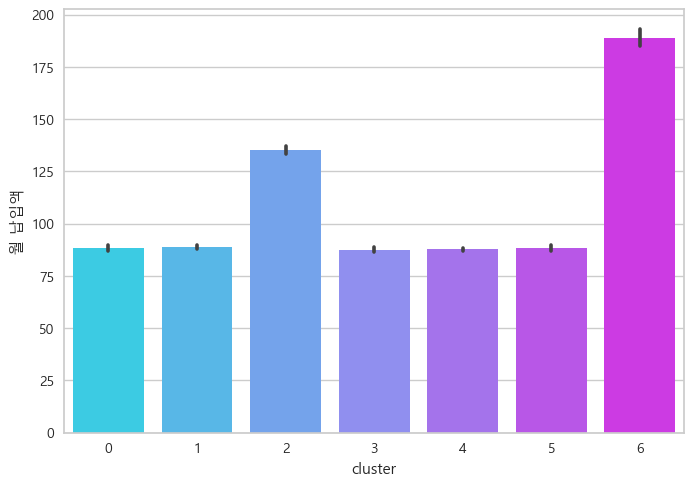

In [122]:
# [문제 27] '월 납입액'은 수치형으로 각 clust 별 min,max,mean,median 통계 값으로 확인해보자.
# groupby 와 agg() 메소드를 활용하여 도출해 보자.

feature = '월 납입액'
display(result[['cluster',feature]].groupby(['cluster']).agg(['max','min','mean','median']))
# 추후 변경 권장
# result[['cluster', feature]].groupby(['cluster'], observed=False).agg(['max','min','mean','median'])

# 시각화를 해 봅시다.
sns.barplot(x='cluster', y=feature, data=result, palette='cool')
# 추후 변경 권장
# sns.barplot(x='cluster', y=feature, data=result, hue='cluster', palette='cool', legend=False)
plt.show()

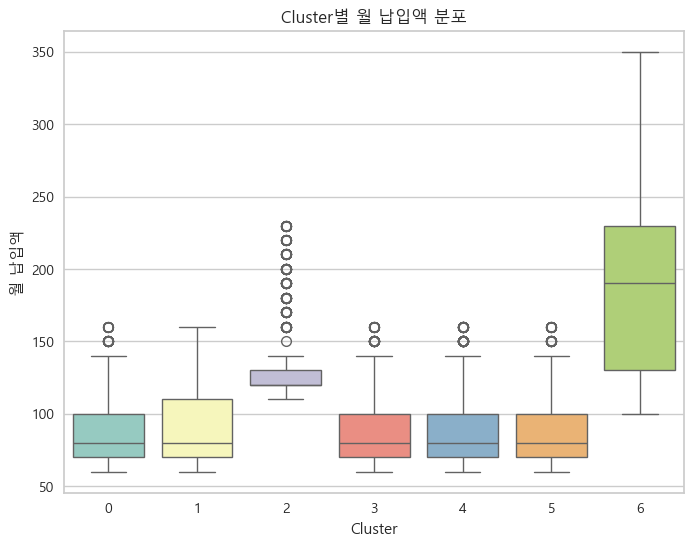

In [123]:
# Boxplot 시각화
plt.figure(figsize=(8,6))
sns.boxplot(x='cluster', y='월 납입액', data=result, palette="Set3")
plt.title("Cluster별 월 납입액 분포")
plt.xlabel("Cluster")
plt.ylabel("월 납입액")
plt.show()

<b>**'월 납입액' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

전체 분포 및 요약
- 고객이 매월 내는 보험료로 고납입군에겐 **장기혜택/보장 업셀**, 저납입 및 가격 민감군에겐 **요금 최적화 컨설팅**이 필요함

클러스터별 분석
- cluster 0: 월 평균 8만 8천원 정도 납입하며, 최소 납입 금액은 6만원, 최대 납입 금액은 16만원이다. 최대 납입 금액과 평균 납입 규모 차이가 큼(이상치 있음)
- cluster 1: 월 평균 8만 8천원 정도 납입하며, 최소 납입 금액은 6만원, 최대 납입 금액은 16만원이다.
- cluster 2: 월 평균 13만 5천원 정도 납입하며, 최소 납입 금액은 11만원, 최대 납입 금액은 23만원이다. 최대 납입 금액과 평균 납입 규모 차이가 큼(이상치 많음) => **고납입군**
- cluster 3: 월 평균 8만 7천원 정도 납입하며, 최소 납입 금액은 6만원, 최대 납입 금액은 16만원이다. 최대 납입 금액과 평균 납입 규모 차이가 큼(이상치 있음)
- cluster 4: 월 평균 8만 7천원 정도 납입하며, 최소 납입 금액은 6만원, 최대 납입 금액은 16만원이다. 최대 납입 금액과 평균 납입 규모 차이가 큼(이상치 있음)
- cluster 5: 월 평균 8만 8천원 정도 납입하며, 최소 납입 금액은 6만원, 최대 납입 금액은 16만원이다. 최대 납입 금액과 평균 납입 규모 차이가 큼(이상치 있음)
- cluster 6: 월 평균 18만 9천원 정도 납입하며, 최소 납입 금액은 10만원, 최대 납입 금액은 35만원이다. => **고납입군**

### **11) VOC**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
VOC,,,,,,,,,,,,,,,,
0,847,2399,764,1266,2612,850,777,9515,0.785,0.795,0.803,0.797,0.790,0.787,0.795,0.793
1,107,329,99,156,380,131,111,1313,0.099,0.109,0.104,0.098,0.115,0.121,0.114,0.109
2,51,124,49,65,124,34,48,495,0.047,0.041,0.052,0.041,0.038,0.031,0.049,0.041
3,41,101,24,69,105,35,30,405,0.038,0.033,0.025,0.043,0.032,0.032,0.031,0.034
4,27,44,9,19,62,27,8,196,0.025,0.015,0.009,0.012,0.019,0.025,0.008,0.016
5,6,22,6,14,22,3,3,76,0.006,0.007,0.006,0.009,0.007,0.003,0.003,0.006
All,1079,3019,951,1589,3305,1080,977,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


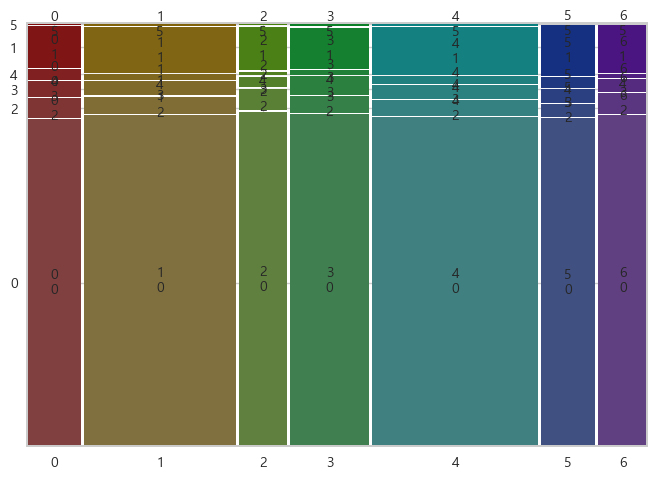

In [124]:
# [문제 29] 'VOC' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = 'VOC'

# 교차표(crosstab)로 합계 확인: 각 VOC가 몇 건씩 속해 있는지 빈도(합계)를 보여줌
pro_df8_1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.
pro_df8_2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df8_2 = pro_df8_2.round(3)

# 합치기, concat: 빈도표(pro_df8_1)와 비율표(pro_df8_2)를 옆으로 붙임
pro_df8 = pd.concat([pro_df8_1, pro_df8_2], axis=1)

# pro_df8 확인
display(pro_df8)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), ['cluster', feature])
plt.show()

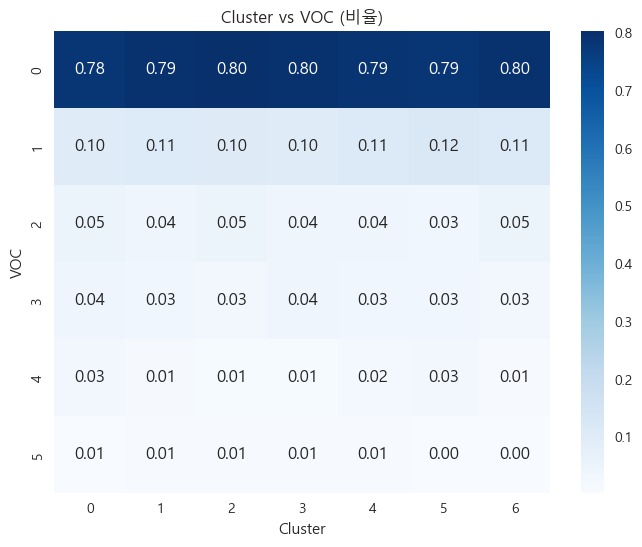

In [125]:
# 히트맵으로 시각화하기
# 교차표 생성 (비율 기준)
crosstab = pd.crosstab(result['VOC'], result['cluster'], normalize='columns')

# Heatmap 시각화
plt.figure(figsize=(8,6))
sns.heatmap(crosstab, annot=True, fmt=".2f", cmap="Blues")
plt.title("Cluster vs VOC (비율)")
plt.ylabel("VOC")
plt.xlabel("Cluster")
plt.show()

<b>**'VOC' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

- 전체적으로 고객 문의나 불만 발생, 부정을 표한 점수가 없음 (0이 7~80% 차지)
- 가격/보장/서비스 등 유형을 분류하고, 중복/연속 건 합산 규칙을 명시했는지 파악해야 함
- 전략: 해지방어 콜, 불만 원인 FAQ/튜토리얼 즉시 투입

### **12) 타 상품 보유 현황**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
타 상품 보유 현황,,,,,,,,,,,,,,,,
1,439,1026,329,568,1163,403,355,4283,0.407,0.340,0.346,0.357,0.352,0.373,0.363,0.357
2,251,783,267,359,850,262,245,3017,0.233,0.259,0.281,0.226,0.257,0.243,0.251,0.251
3,132,391,120,229,421,147,105,1545,0.122,0.130,0.126,0.144,0.127,0.136,0.107,0.129
4이상,257,819,235,433,871,268,272,3155,0.238,0.271,0.247,0.272,0.264,0.248,0.278,0.263
All,1079,3019,951,1589,3305,1080,977,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


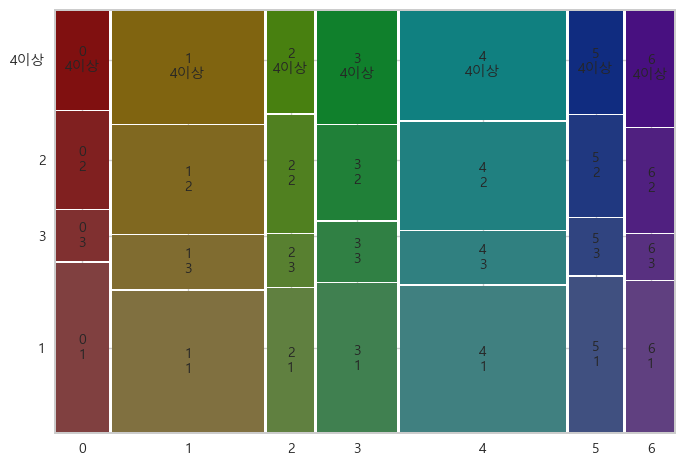

In [126]:
# [문제 31] '타 상품 보유 현황' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '타 상품 보유 현황'

# 교차표(crosstab)로 합계 확인: 각 타 상품 보유 현황이 몇 건씩 속해 있는지 빈도(합계)를 보여줌
pro_df9_1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.
pro_df9_2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df9_2 = pro_df9_2.round(3)

# 합치기, concat: 빈도표(pro_df9_1)와 비율표(pro_df9_2)를 옆으로 붙임
pro_df9 = pd.concat([pro_df9_1, pro_df9_2], axis=1)

# pro_df9 확인
display(pro_df9)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), ['cluster', feature])
plt.show()

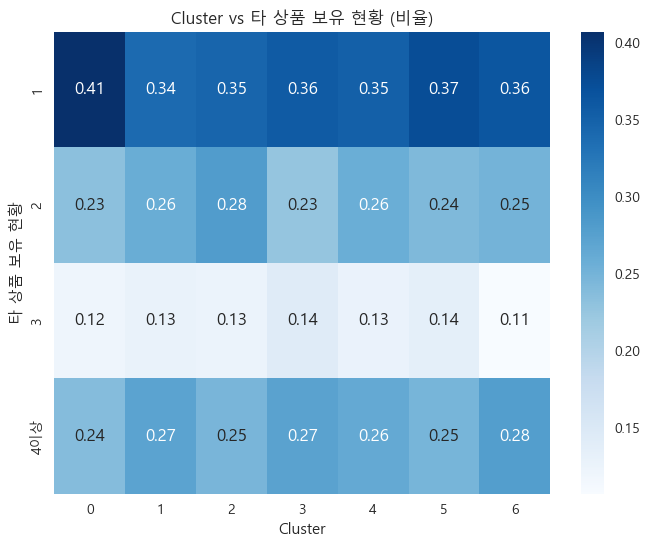

In [127]:
# 히트맵으로 시각화하기
# 교차표 생성 (비율 기준)
crosstab = pd.crosstab(result['타 상품 보유 현황'], result['cluster'], normalize='columns')

# Heatmap 시각화
plt.figure(figsize=(8,6))
sns.heatmap(crosstab, annot=True, fmt=".2f", cmap="Blues")
plt.title("Cluster vs 타 상품 보유 현황 (비율)")
plt.ylabel("타 상품 보유 현황")
plt.xlabel("Cluster")
plt.show()

<b>**'타 상품 보유 현황	' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

전체 분포 및 요약
<br>같은 보험사에서 보유한 다른 상품 수로 **교차판매 적합도**와 **충성도**를 파악할 수 있음
<br>전략: 다보유 군 => 패키지/번들 혜택 부여, 미보유 군에겐 입문형&저장벽 상품 제공 (모든 클러스터에 미보유군은 없음)

클러스터별 분석
- cluster 0: 41%(439명)가 1개 보유하고 있으며, 24%(257명)이 4개 이상 보유하고 있으며, 23%(251명)이 2개 보유하고 있으며, 12%(132명)가 3개 보유하고 있음
- cluster 1: 34%(1026명)가 1개 보유하고 있으며, 27%(819명)이 4개 이상 보유하고 있으며, 26%(783명)이 2개 보유하고 있으며, 13%(391명)가 3개 보유하고 있음
- cluster 2: 35%(329명)가 1개 보유하고 있으며, 25%(235명)이 4개 이상 보유하고 있으며, 28%(267명)이 2개 보유하고 있으며, 13%(120명)가 3개 보유하고 있음
- cluster 3: 36%(568명)가 1개 보유하고 있으며, 27%(433명)이 4개 이상 보유하고 있으며, 23%(359명)이 2개 보유하고 있으며, 14%(229명)가 3개 보유하고 있음
- cluster 4: 35%(1163명)가 1개 보유하고 있으며, 26%(871명)이 4개 이상 보유하고 있으며, 26%(850명)이 2개 보유하고 있으며, 13%(421명)가 3개 보유하고 있음
- cluster 5: 37%(403명)가 1개 보유하고 있으며, 25%(268명)이 4개 이상 보유하고 있으며, 24%(262명)이 2개 보유하고 있으며, 14%(147명)가 3개 보유하고 있음
- cluster 6: 36%(355명)가 1개 보유하고 있으며, 28%(272명)이 4개 이상 보유하고 있으며, 25%(245명)이 2개 보유하고 있으며, 11%(105명)가 3개 보유하고 있음

### **13) 갱신 인센티브**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
갱신인센티브,,,,,,,,,,,,,,,,
설계사독려,382,718,255,701,1140,381,288,3865,0.354,0.238,0.268,0.441,0.345,0.353,0.295,0.322
없음,118,240,64,228,441,149,98,1338,0.109,0.079,0.067,0.143,0.133,0.138,0.100,0.112
포인트,159,433,145,233,572,197,152,1891,0.147,0.143,0.152,0.147,0.173,0.182,0.156,0.158
할인,420,1628,487,427,1152,353,439,4906,0.389,0.539,0.512,0.269,0.349,0.327,0.449,0.409
All,1079,3019,951,1589,3305,1080,977,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


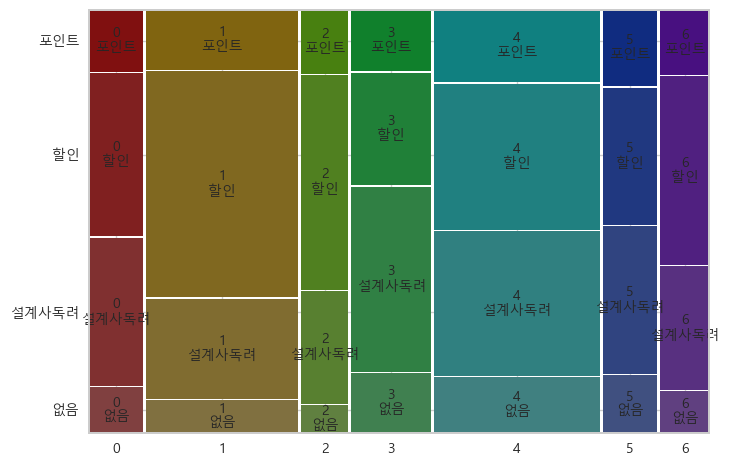

In [128]:
# [문제 33] '갱신인센티브' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '갱신인센티브'

# 교차표(crosstab)로 합계 확인: 각 갱신 인센티브가 몇 건씩 속해 있는지 빈도(합계)를 보여줌
pro_df10_1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.
pro_df10_2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df10_2 = pro_df10_2.round(3)

# 합치기, concat: 빈도표(pro_df10_1)와 비율표(pro_df10_2)를 옆으로 붙임
pro_df10 = pd.concat([pro_df10_1, pro_df10_2], axis=1)

# pro_df10 확인
display(pro_df10)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), ['cluster', feature])
plt.show()

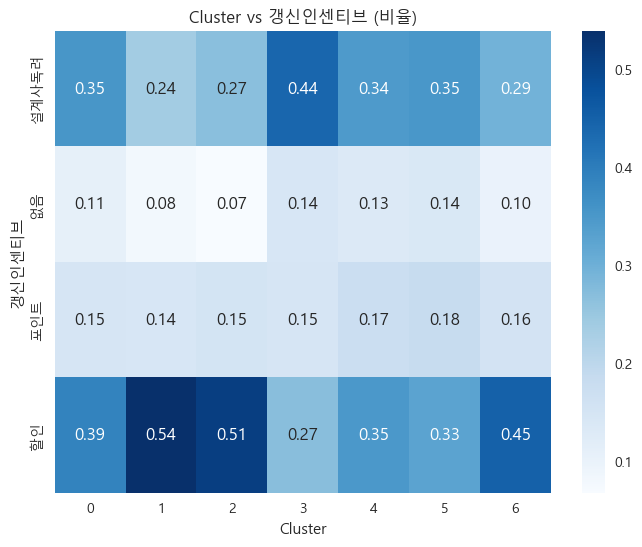

In [129]:
# 히트맵으로 시각화하기
# 교차표 생성 (비율 기준)
crosstab = pd.crosstab(result['갱신인센티브'], result['cluster'], normalize='columns')

# Heatmap 시각화
plt.figure(figsize=(8,6))
sns.heatmap(crosstab, annot=True, fmt=".2f", cmap="Blues")
plt.title("Cluster vs 갱신인센티브 (비율)")
plt.ylabel("갱신인센티브")
plt.xlabel("Cluster")
plt.show()

<b>**'갱신인센티브	' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

전체 분포 및 요약
<br> 보험사가 갱신을 목적으로 한 마케팅 활동
- 정의: 갱신 시점 도래 여부, 제시된 혜택(할인/포인트 등) 유무
- 전략: 갱신 임박 군에겐 맞춤 혜택/ 요금 최적화, 갱신이 멀리 있는 군집은 관계 강화 콘텐츠

클러스터별 분석
- cluster 0: 할인(39%)와 설계사 독려(35%)를 중심으로 갱신 마케팅 활동을 진행하였음
- cluster 1: 할인(54%)를 중심으로 설계사 독려(24%), 포인트(14%) 순으로 진행하였음
- cluster 2: 할인(51%)를 중심으로 설계사 독려(27%), 포인트(15%) 순으로 진행하였음
- cluster 3: 설계사 독려(44%)를 중심으로 할인(27%), 포인트(15%) 순으로 진행하였음
- cluster 4: 할인(35%)과 설계사 독려(34%)를 중심으로 진행하였음
- cluster 5: 할인(33%)과 설계사 독려(35%)를 중심으로 진행하였음
- cluster 6: 할인(45%)을 중심으로 설계사 독려(29%), 포인트(16%) 순으로 진행하였음

### **14) 총 지불 금액(수치)**

총지불금액                              
             max   min          mean    median
cluster                                       
0        1700000  1000  4.482734e+05  427000.0
1        1919000  3000  6.220374e+05  578000.0
2        2663000  1000  7.176435e+05  674000.0
3        1040000     0  3.432498e+05  351000.0
4        1512000  1000  4.221198e+05  409000.0
5        1340000  2000  3.806731e+05  385000.0
6        3573000  2000  1.055549e+06  957000.0

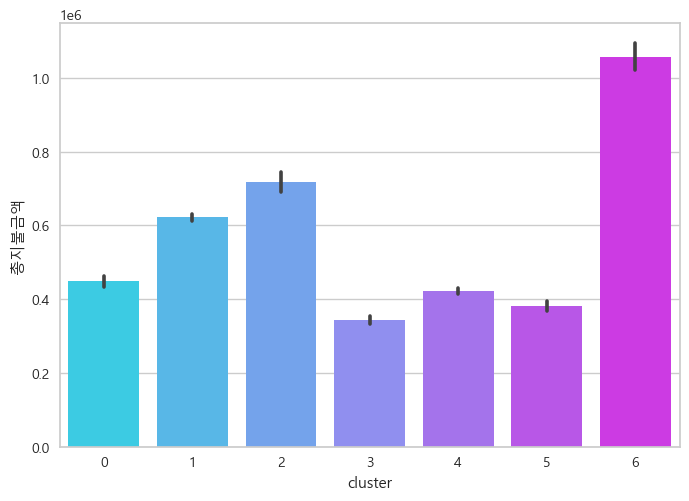

In [130]:
# [문제 35] '총지불금액'은 수치형으로 각 clust 별 min,max,mean,median 통계 값으로 확인해보자.
# groupby 와 agg() 메소드를 활용하여 도출해 보자.

feature = '총지불금액'
display(result[['cluster',feature]].groupby(['cluster']).agg(['max','min','mean','median']))
# 추후 변경 권장
# result[['cluster', feature]].groupby(['cluster'], observed=False).agg(['max','min','mean','median'])

# 시각화를 해 봅시다.
sns.barplot(x='cluster', y=feature, data=result, palette='cool')
# 추후 변경 권장
# sns.barplot(x='cluster', y=feature, data=result, hue='cluster', palette='cool', legend=False)
plt.show()

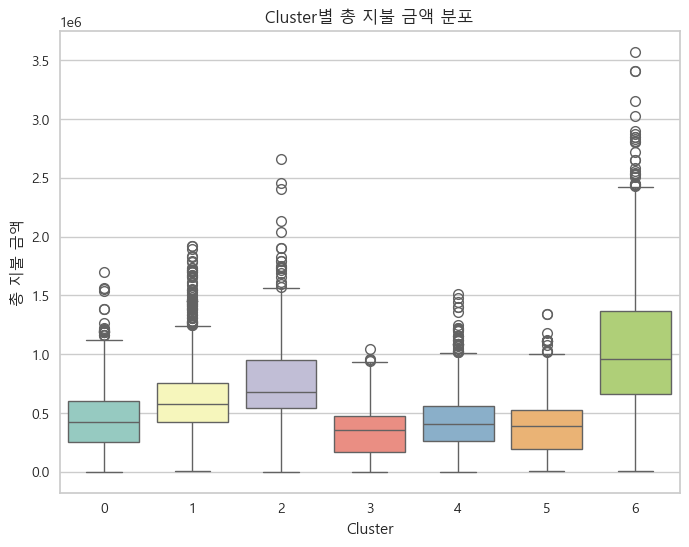

In [131]:
# Boxplot 시각화
plt.figure(figsize=(8,6))
sns.boxplot(x='cluster', y='총지불금액', data=result, palette="Set3")
plt.title("Cluster별 총 지불 금액 분포")
plt.xlabel("Cluster")
plt.ylabel("총 지불 금액")
plt.show()

<b>**'총지불금액' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

전체 분포 및 요약
- 고객이 받은 금액으로 ```관계 기간*기여도```를 보여줌
- 단종/전환 이력 포함 여부 확인, 예측 시점 이후에 금액이 섞이면 누수 발생 위험
- 전략: 고LTV 군에겐 프리미엄 케어/리텐션, 저LTV 군엔 온보딩 및 안착 캠페인

클러스터별 분석
- cluster 0: 의료비 청구 후 심사 후 지급 금액이 중간 수준이며, 평균과 중앙값이 비슷해 분포가 비교적 균형적
- cluster 1: 평균이 중앙값보다 높아 고액 지급을 받은 사람이 존재함
- cluster 2: 고액 지급을 받은 사람이 많음
- cluster 3: 최소값이 0으로 지급을 받지 못한 사람도 있음
- cluster 4: 클러스터 0과 유사함
- cluster 5: 클러스터 0과 유사함: 안정적으로 지급을 받음
- cluster 6: 클러스터 중 가장 고액 지급을 받은 집단으로, 고가 상품 또는 VIP 고객일 가능성이 있음

### **15) 자동차**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
자동차,,,,,,,,,,,,,,,,
SUV,209,698,194,315,716,200,4,2336,0.194,0.231,0.204,0.198,0.217,0.185,0.004,0.195
고급차,0,0,0,0,0,0,454,454,0.000,0.000,0.000,0.000,0.000,0.000,0.465,0.038
스포츠카,34,5,6,46,3,39,519,652,0.032,0.002,0.006,0.029,0.001,0.036,0.531,0.054
일반세단,564,1653,556,833,1879,589,0,6074,0.523,0.548,0.585,0.524,0.569,0.545,0.000,0.506
컴팩트카,272,663,195,395,707,252,0,2484,0.252,0.220,0.205,0.249,0.214,0.233,0.000,0.207
All,1079,3019,951,1589,3305,1080,977,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


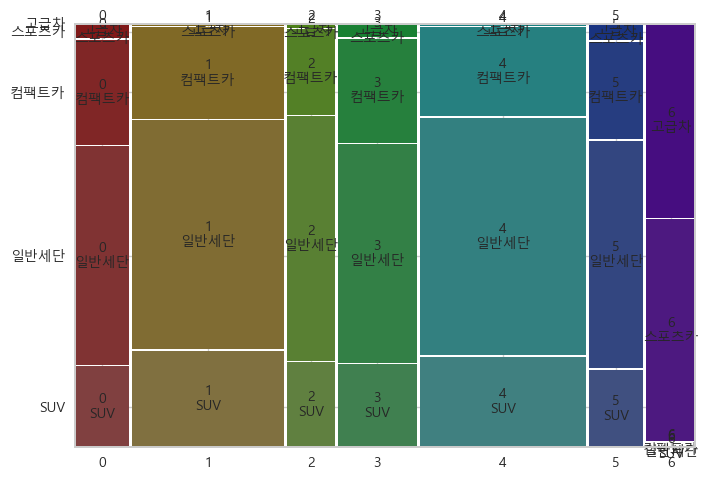

In [132]:
# [문제 37] '자동차' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '자동차'

# 교차표(crosstab)로 합계 확인: 각 자동차가 몇 건씩 속해 있는지 빈도(합계)를 보여줌
pro_df11_1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.
pro_df11_2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df11_2 = pro_df11_2.round(3)

# 합치기, concat: 빈도표(pro_df11_1)와 비율표(pro_df11_2)를 옆으로 붙임
pro_df11 = pd.concat([pro_df11_1, pro_df11_2], axis=1)

# pro_df11 확인
display(pro_df11)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), ['cluster', feature])
plt.show()

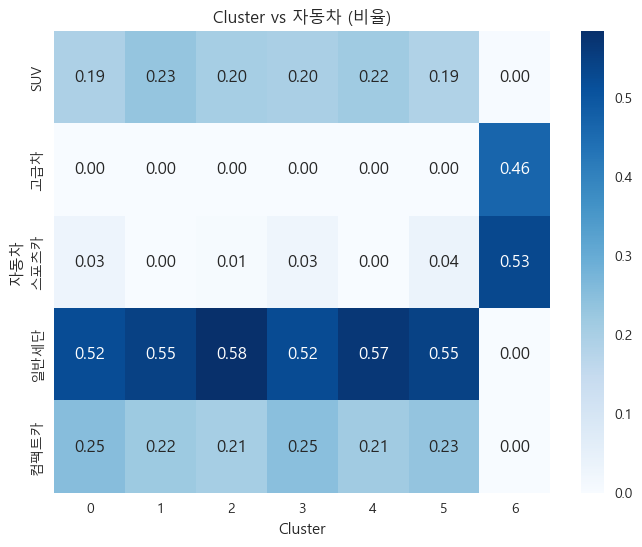

In [133]:
# 히트맵으로 시각화하기
# 교차표 생성 (비율 기준)
crosstab = pd.crosstab(result['자동차'], result['cluster'], normalize='columns')

# Heatmap 시각화
plt.figure(figsize=(8,6))
sns.heatmap(crosstab, annot=True, fmt=".2f", cmap="Blues")
plt.title("Cluster vs 자동차 (비율)")
plt.ylabel("자동차")
plt.xlabel("Cluster")
plt.show()

<b>**'자동차' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

클러스터별 분석
- cluster 0: 52%가 일반 세단을 등록, 25%가 컴팩트카, 19%가 SUV 등록
- cluster 1: 55%가 일반 세단을 등록, 22%가 컴팩트카, 23%가 SUV 등록
- cluster 2: 58%가 일반 세단을 등록, 21%가 컴팩트카, 20%가 SUV 등록
- cluster 3: 52%가 일반 세단을 등록, 25%가 컴팩트카, 20%가 SUV 등록
- cluster 4: 57%가 일반 세단을 등록, 21%가 컴팩트카, 22%가 SUV 등록
- cluster 5: 55%가 일반 세단을 등록, 23%가 컴팩트카, 19%가 SUV 등록
- cluster 6: 53%가 스포츠카를 등록, 46%가 고급차를 등록

 ### **16) 거주지 사이즈**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
거주지사이즈,,,,,,,,,,,,,,,,
대,1079,0,85,0,0,0,81,1245,1.0,0.000,0.089,0.000,0.000,0.000,0.083,0.104
소,0,675,185,343,699,249,181,2332,0.0,0.224,0.195,0.216,0.211,0.231,0.185,0.194
중,0,2344,681,1246,2606,831,715,8423,0.0,0.776,0.716,0.784,0.789,0.769,0.732,0.702
All,1079,3019,951,1589,3305,1080,977,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


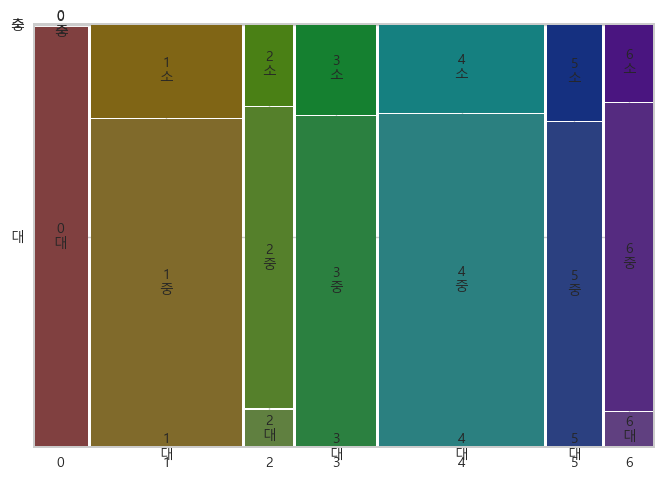

In [134]:
# [문제 39] '거주지사이즈' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '거주지사이즈'

# 교차표(crosstab)로 합계 확인: 각 거주지 사이즈가 몇 건씩 속해 있는지 빈도(합계)를 보여줌
pro_df12_1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.
pro_df12_2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df12_2 = pro_df12_2.round(3)

# 합치기, concat: 빈도표(pro_df12_1)와 비율표(pro_df12_2)를 옆으로 붙임
pro_df12 = pd.concat([pro_df12_1, pro_df12_2], axis=1)

# pro_df12 확인
display(pro_df12)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), ['cluster', feature])
plt.show()

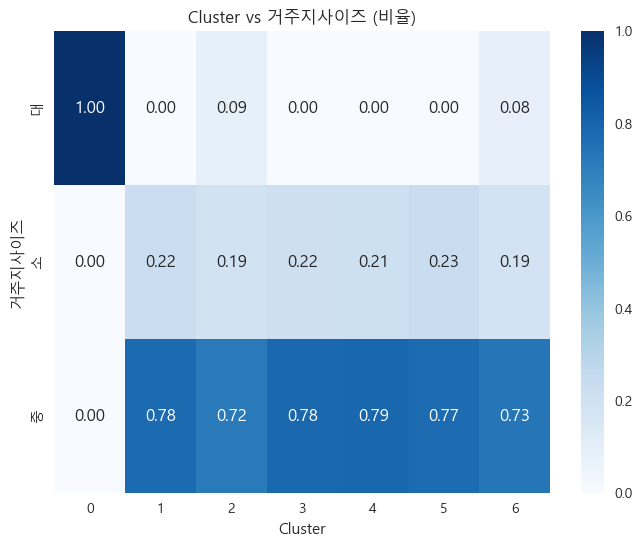

In [135]:
# 히트맵으로 시각화하기
# 교차표 생성 (비율 기준)
crosstab = pd.crosstab(result['거주지사이즈'], result['cluster'], normalize='columns')

# Heatmap 시각화
plt.figure(figsize=(8,6))
sns.heatmap(crosstab, annot=True, fmt=".2f", cmap="Blues")
plt.title("Cluster vs 거주지사이즈 (비율)")
plt.ylabel("거주지사이즈")
plt.xlabel("Cluster")
plt.show()

<b>**'거주지사이즈' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

클러스터별 분석
- cluster 0: 100%가 거주지 사이즈 대에 속함
- cluster 1: 78%가 거주지 사이즈 중, 22%가 소에 속함
- cluster 2: 72%가 거주지 사이즈 중, 19%가 소에, 9%가 대에 속함
- cluster 3: 78%가 거주지 사이즈 중, 22%가 소에 속함
- cluster 4: 79%가 거주지 사이즈 중, 21%가 소에 속함
- cluster 5: 77%가 거주지 사이즈 중, 23%가 소에 속함
- cluster 6: 73%가 거주지 사이즈 중, 19%가 소에, 8%가 대에 속함

전체 분포 및 요약

### **17) 갱신**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
갱신,,,,,,,,,,,,,,,,
0,868,2540,825,1386,2906,922,837,10284,0.804,0.841,0.868,0.872,0.879,0.854,0.857,0.857
1,211,479,126,203,399,158,140,1716,0.196,0.159,0.132,0.128,0.121,0.146,0.143,0.143
All,1079,3019,951,1589,3305,1080,977,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


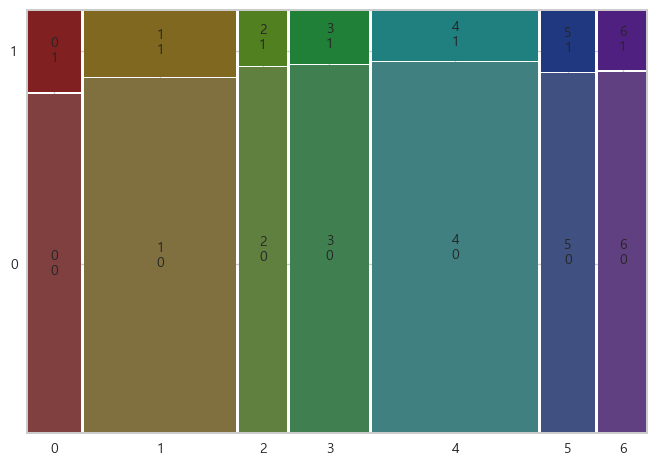

In [136]:
# [문제 41] '갱신' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '갱신'

# 교차표(crosstab)로 합계 확인: 각 갱신이 몇 건씩 속해 있는지 빈도(합계)를 보여줌
pro_df13_1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.
pro_df13_2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df13_2 = pro_df13_2.round(3)

# 합치기, concat: 빈도표(pro_df13_1)와 비율표(pro_df13_2)를 옆으로 붙임
pro_df13 = pd.concat([pro_df13_1, pro_df13_2], axis=1)

# pro_df13 확인
display(pro_df13)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), ['cluster', feature])
plt.show()

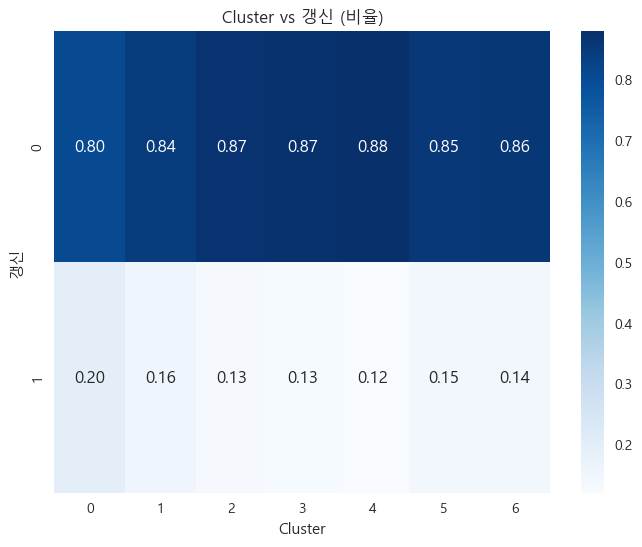

In [137]:
# 히트맵으로 시각화하기
# 교차표 생성 (비율 기준)
crosstab = pd.crosstab(result['갱신'], result['cluster'], normalize='columns')

# Heatmap 시각화
plt.figure(figsize=(8,6))
sns.heatmap(crosstab, annot=True, fmt=".2f", cmap="Blues")
plt.title("Cluster vs 갱신 (비율)")
plt.ylabel("갱신")
plt.xlabel("Cluster")
plt.show()

<b>**'갱신' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

전체 분포 및 요약: 약 80% 이상은 갱신하지 않으며 약 10~20%만 갱신함
- 그나마 갱신율이 가장 높은 클러스터는 클러스터 0(20%)이고, 가장 낮은 클러스터는 클러스터 4(12%)이다.

### **18) 지역**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
지역,,,,,,,,,,,,,,,,
도시근교,648,2754,658,539,1772,469,732,7572,0.601,0.912,0.692,0.339,0.536,0.434,0.749,0.631
도심,175,130,111,505,770,268,125,2084,0.162,0.043,0.117,0.318,0.233,0.248,0.128,0.174
시골,256,135,182,545,763,343,120,2344,0.237,0.045,0.191,0.343,0.231,0.318,0.123,0.195
All,1079,3019,951,1589,3305,1080,977,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


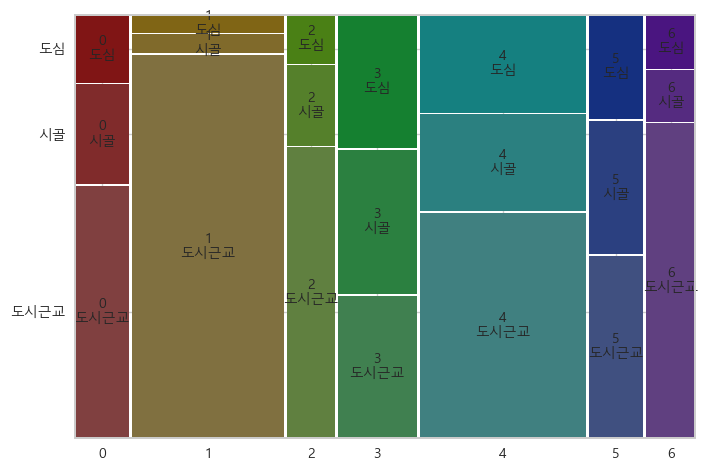

In [138]:
# [문제 43] '지역' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '지역'

# 교차표(crosstab)로 합계 확인: 각 지역이 몇 건씩 속해 있는지 빈도(합계)를 보여줌
pro_df14_1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.
pro_df14_2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df14_2 = pro_df14_2.round(3)

# 합치기, concat: 빈도표(pro_df14_1)와 비율표(pro_df14_2)를 옆으로 붙임
pro_df14 = pd.concat([pro_df14_1, pro_df14_2], axis=1)

# pro_df14 확인
display(pro_df14)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), ['cluster', feature])
plt.show()

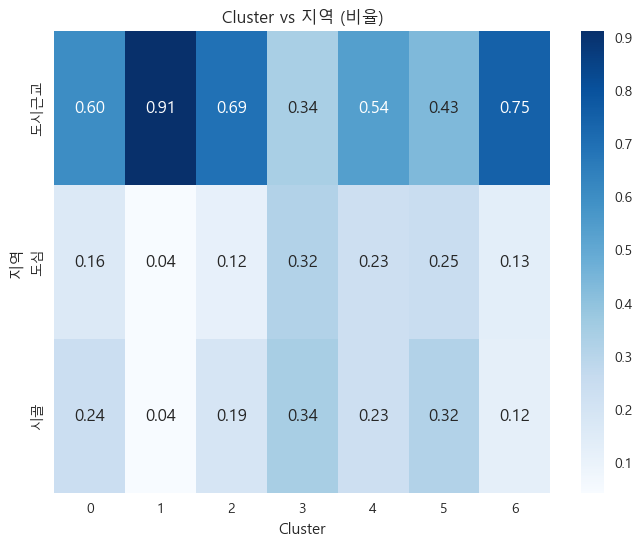

In [139]:
# 히트맵으로 시각화하기
# 교차표 생성 (비율 기준)
crosstab = pd.crosstab(result['지역'], result['cluster'], normalize='columns')

# Heatmap 시각화
plt.figure(figsize=(8,6))
sns.heatmap(crosstab, annot=True, fmt=".2f", cmap="Blues")
plt.title("Cluster vs 지역 (비율)")
plt.ylabel("지역")
plt.xlabel("Cluster")
plt.show()

<b>**'지역' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

클러스터별 분석
- cluster 0: 60%가 도시 근교에서 거주하고 있으며, 24%는 시골, 16%는 도심에서 거주하고 있음
- cluster 1: 91%가 도시 근교에서 거주하고 있으며, 4%는 시골, 4%는 도심에서 거주하고 있음
- cluster 2: 69%가 도시 근교에서 거주하고 있으며, 19%는 시골, 12%는 도심에서 거주하고 있음
- cluster 3: 34%가 도시 근교에서 거주하고 있으며, 34%는 시골, 32%는 도심에서 거주하고 있음 (거주지 분포가 고름)
- cluster 4: 54%가 도시 근교에서 거주하고 있으며, 23%는 시골, 23%는 도심에서 거주하고 있음
- cluster 5: 43%가 도시 근교에서 거주하고 있으며, 32%는 시골, 25%는 도심에서 거주하고 있음
- cluster 6: 75%가 도시 근교에서 거주하고 있으며, 12%는 시골, 13%는 도심에서 거주하고 있음

전체 분포 및 요약
- 대부분의 클러스터는 도시 근교에서 거주하는 비중이 가장 높음

### **19) 온라인방문빈도**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
온라인방문빈도,,,,,,,,,,,,,,,,
비방문,809,2266,713,1149,2436,832,723,8928,0.75,0.751,0.750,0.723,0.737,0.77,0.740,0.744
자주방문,227,631,204,364,735,205,209,2575,0.21,0.209,0.215,0.229,0.222,0.19,0.214,0.215
종종,43,122,34,76,134,43,45,497,0.04,0.040,0.036,0.048,0.041,0.04,0.046,0.041
All,1079,3019,951,1589,3305,1080,977,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


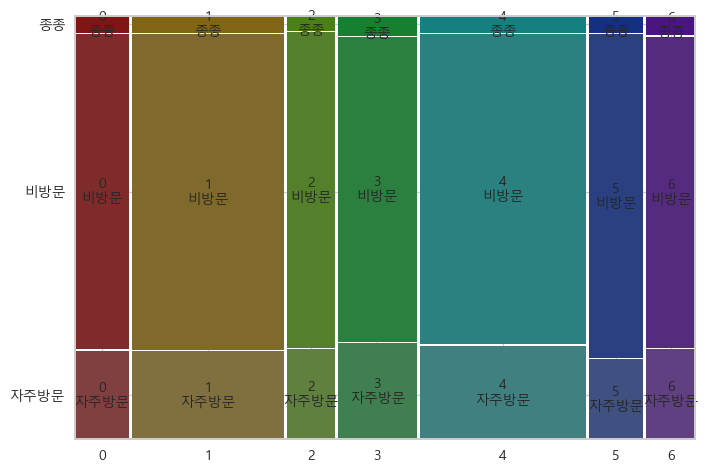

In [140]:
# [문제 45] '온라인방문빈도' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '온라인방문빈도'

# 교차표(crosstab)로 합계 확인: 각 온라인 방문 빈도가 몇 건씩 속해 있는지 빈도(합계)를 보여줌
pro_df15_1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.
pro_df15_2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df15_2 = pro_df15_2.round(3)

# 합치기, concat: 빈도표(pro_df15_1)와 비율표(pro_df15_2)를 옆으로 붙임
pro_df15 = pd.concat([pro_df15_1, pro_df15_2], axis=1)

# pro_df15 확인
display(pro_df15)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), ['cluster', feature])
plt.show()

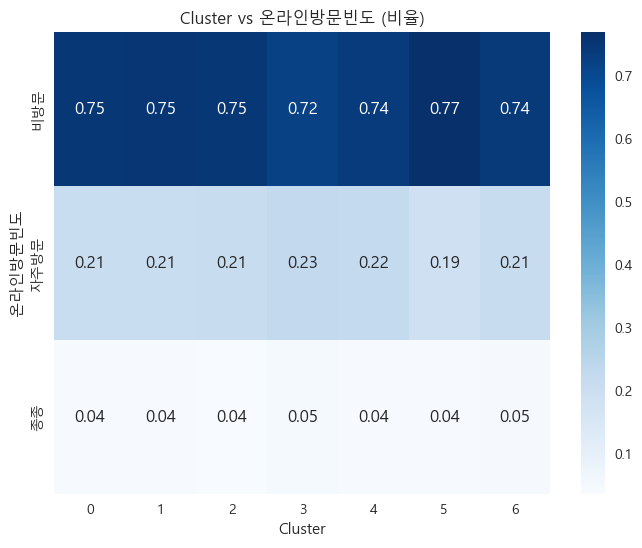

In [141]:
# 히트맵으로 시각화하기
# 교차표 생성 (비율 기준)
crosstab = pd.crosstab(result['온라인방문빈도'], result['cluster'], normalize='columns')

# Heatmap 시각화
plt.figure(figsize=(8,6))
sns.heatmap(crosstab, annot=True, fmt=".2f", cmap="Blues")
plt.title("Cluster vs 온라인방문빈도 (비율)")
plt.ylabel("온라인방문빈도")
plt.xlabel("Cluster")
plt.show()

<b>**'온라인방문빈도' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

전체 분포 및 요약
- 클러스터 집단 모두 약 75%는 3개월 기준 자사 웹페이지에 방문하는 경우가 없으며 약 20% 정도는 자주 방문함

### **20) 판매채널**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
판매채널,,,,,,,,,,,,,,,,
대리점,385,1216,341,593,1270,400,387,4592,0.357,0.403,0.359,0.373,0.384,0.370,0.396,0.383
인터넷,141,438,149,238,466,145,163,1740,0.131,0.145,0.157,0.150,0.141,0.134,0.167,0.145
자사영업,334,803,271,420,938,321,262,3349,0.310,0.266,0.285,0.264,0.284,0.297,0.268,0.279
콜센터,219,562,190,338,631,214,165,2319,0.203,0.186,0.200,0.213,0.191,0.198,0.169,0.193
All,1079,3019,951,1589,3305,1080,977,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


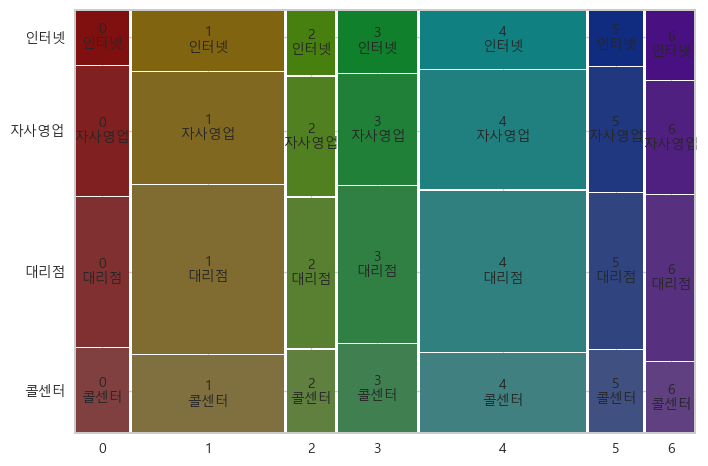

In [142]:
# [문제 47] '판매채널' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '판매채널'

# 교차표(crosstab)로 합계 확인: 각 온라인 방문 빈도가 몇 건씩 속해 있는지 빈도(합계)를 보여줌
pro_df16_1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.
pro_df16_2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df16_2 = pro_df16_2.round(3)

# 합치기, concat: 빈도표(pro_df16_1)와 비율표(pro_df16_2)를 옆으로 붙임
pro_df16 = pd.concat([pro_df16_1, pro_df16_2], axis=1)

# pro_df16 확인
display(pro_df16)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), ['cluster', feature])
plt.show()

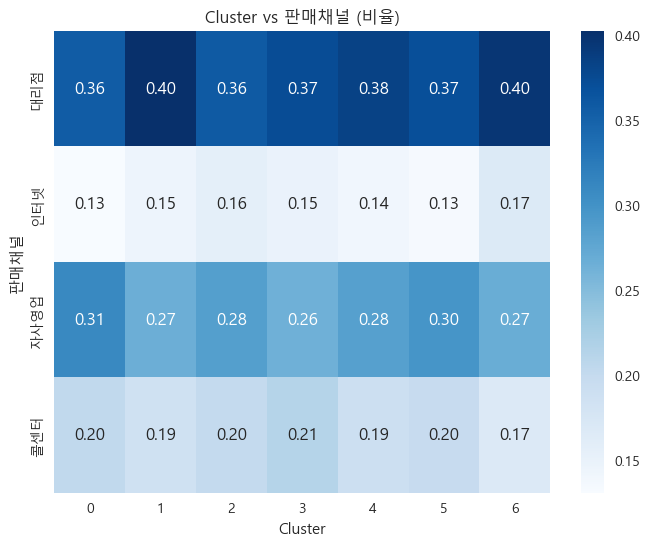

In [143]:
# 히트맵으로 시각화하기
# 교차표 생성 (비율 기준)
crosstab = pd.crosstab(result['판매채널'], result['cluster'], normalize='columns')

# Heatmap 시각화
plt.figure(figsize=(8,6))
sns.heatmap(crosstab, annot=True, fmt=".2f", cmap="Blues")
plt.title("Cluster vs 판매채널 (비율)")
plt.ylabel("판매채널")
plt.xlabel("Cluster")
plt.show()

<b>**'판매채널' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

- 최근 거래 및 상담이 일어난 채널은 대리점(4592개: 38.3%), 자사영업(3349개: 27.9%), 콜센터(2319개: 19.3%), 인터넷(1740개: 14.5%) 순으로 이루어짐
- 선호 접덤을 파악(메시지 전달 경로 결정)
- 전략: 채널 선호 군집별로 메시지, CTA 위치 최적화(앱 배너vs문자/콜)

클러스터별 분석
- cluster 0: 대리점이 36%, 자사 영업이 31%, 콜센터가 20%, 인터넷이 13%이다.
- cluster 1: 대리점이 40%, 자사 영업이 27%, 콜센터가 19%, 인터넷이 15%이다.
- cluster 2: 대리점이 36%, 자사 영업이 28%, 콜센터가 20%, 인터넷이 16%이다.
- cluster 3: 대리점이 37%, 자사 영업이 26%, 콜센터가 21%, 인터넷이 15%이다.
- cluster 4: 대리점이 38%, 자사 영업이 28%, 콜센터가 19%, 인터넷이 14%이다.
- cluster 5: 대리점이 37%, 자사 영업이 30%, 콜센터가 20%, 인터넷이 13%이다.
- cluster 6: 대리점이 40%, 자사 영업이 27%, 콜센터가 17%, 인터넷이 17%이다.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 예: 'cluster'와 '고용상태'의 관계를 막대그래프로 시각화
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='cluster', hue='고용상태')
plt.title('클러스터별 고용상태 분포')
plt.xlabel('클러스터')
plt.ylabel('개수')
plt.legend(title='고용상태')
plt.show()

---------------------------------------------------------------------------------------------
## **(2) 결과 정리**

<font color="1E90FF"><b>★ 20가지 피쳐값에 대해 군집별로 분석해 보았고 인사이트도 도출해 보았다. 한번 ppt에 정리해보자!</font>

- cluster 0: 거주지 사이즈가 대인 집단(주 연령대: 40~50대)
- cluster 1: 고용 상태인 사람이 없으며, 미혼 상태인 사람이 많은, 대부분이 도시 근교에서 거주하는 집단(주 연령대: 40대)
- cluster 2: 고급 상품 구매 집단(혜택 중시형) (주 연령대: 30~50대)
- cluster 3: 고용 상태인 사람만 있고 소득이 가장 많은 2030대 구성 집단(+ 거주지 분포 고름)
- cluster 4: 고용 상태인 사람만 있고 40~60로만 구성된 집단
- cluster 5: 고학력자(석박사)로 구성된 집단(주 연령대: 40~50대)
- cluster 6: 스포츠카, 고급차를 가지고 있는 집단(주 연령대: 40~60대)

## **[Mission 3-분석모델 개발]**

* k-means 활용해 군집화 분석 모델 개발 완료
* 프로파일링 기법을 통해 각 피쳐의 군집별 특성에 대해 파악하고 정의 해봄
* 정의 한 것을 가지고 고객 군집별 마케팅 전략 수립

<font color="1E90FF"><b>→ 여러분들은 어떻게 군집에 대해 정의를 내리고 마케팅 방안을 수립하였나요?<br><b>서로의 군집에 대해서 이야기해 보고 발표해 봅시다.<b><br>
    

# <b>Mission 3 완료!
수고하셨습니다!